### Figure 2

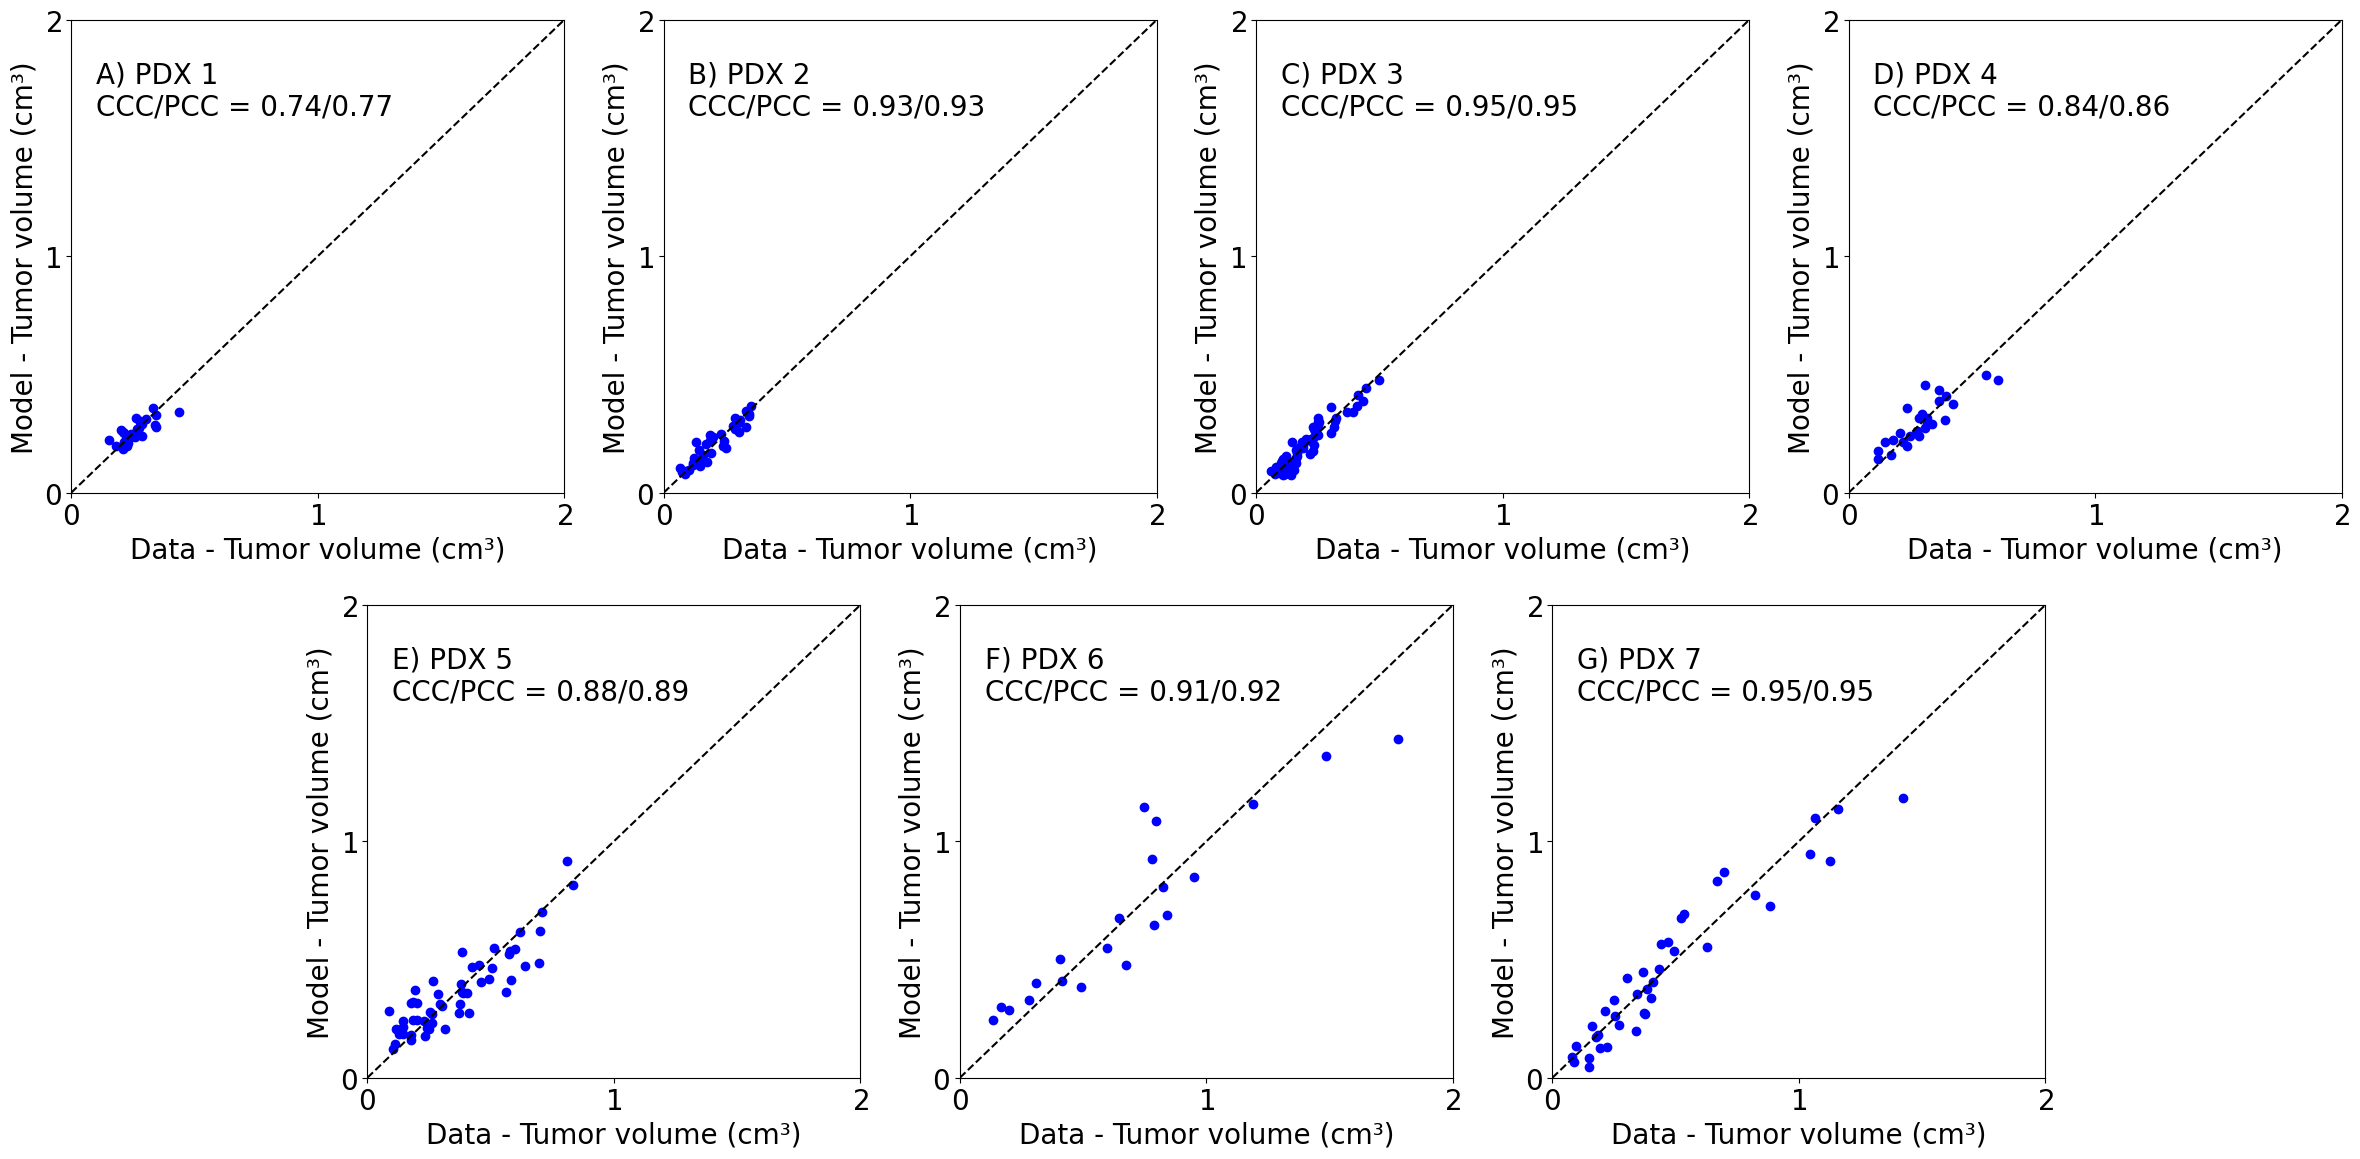

In [1]:
#recent one
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import numpy as np
import string
import pickle

with open(f'./PaperFigures/all_scatterplot.pkl', 'rb') as f:
    all_scatterplot = pickle.load(f)

plt.rcParams['font.size'] = 20

#cells = ['15120','2277','BCM-3204','4849','4175','R2TG8','103']  # 7 plots total
cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total

fig = plt.figure(figsize=(24, 12))  # Wide figure
gs = gridspec.GridSpec(2, 8)  # 2 rows, 8 columns
axes = []

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))

max_value = 2
ticks = np.linspace(0, max_value, 3)

# Top row: use every other column (0, 2, 4, 6)
top_cols = [0, 2, 4, 6]
for i, col in enumerate(top_cols):
    ax = fig.add_subplot(gs[0, col:col+2])  # span 2 columns
    axes.append(ax)

# Bottom row: use inner 3 columns (2, 3, 4, 5, 6) → center over bottom 8 cols
bottom_cols = [1, 3, 5]
for i, col in enumerate(bottom_cols):
    ax = fig.add_subplot(gs[1, col:col+2])  # span 2 columns each
    axes.append(ax)

# Plot data
all_ccc = []
all_pcc = []
all_mape = []
for i, cell in enumerate(cells):
    ax = axes[i]
    matched_key = next((k for k in all_scatterplot if cell in k), None)
    if matched_key is None:
        continue

    E = all_scatterplot[matched_key]['exp'] / 1000
    M = all_scatterplot[matched_key]['model'] / 1000
    ax.plot(E, M, 'o', color='blue')

    identity = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='dashed', transform=ax.transAxes)
    ax.add_line(identity)

    ax.set_xlim((0, max_value))
    ax.set_ylim((0, max_value))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xlabel('Data - Tumor volume (cm³)')
    ax.set_ylabel('Model - Tumor volume (cm³)')
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    all_ccc.append(all_scatterplot[matched_key]["ccc"])
    all_pcc.append(all_scatterplot[matched_key]["pcc"])
    all_mape.append(all_scatterplot[matched_key]["mape"])
    ax.text(0.05,.8,f'{string.ascii_uppercase[i]}) {labels[i]}\
            \nCCC/PCC = {all_scatterplot[matched_key]["ccc"]:.2f}/{all_scatterplot[matched_key]["pcc"]:.2f}'
            ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)

plt.tight_layout()
plt.savefig('./PaperFigures/figure02a.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

In [2]:
import numpy as np

CCC = all_mape

# Median
median_ccc = np.median(CCC)

# IQR (Interquartile Range)
q1 = np.percentile(CCC, 25)
q3 = np.percentile(CCC, 75)
iqr_ccc = q3 - q1

print(f"Median MAPE: {median_ccc:.2f}")
print(f"IQR MAPE: {iqr_ccc:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})")


Median MAPE: 17.29
IQR MAPE: 8.36 (Q1: 14.94, Q3: 23.30)


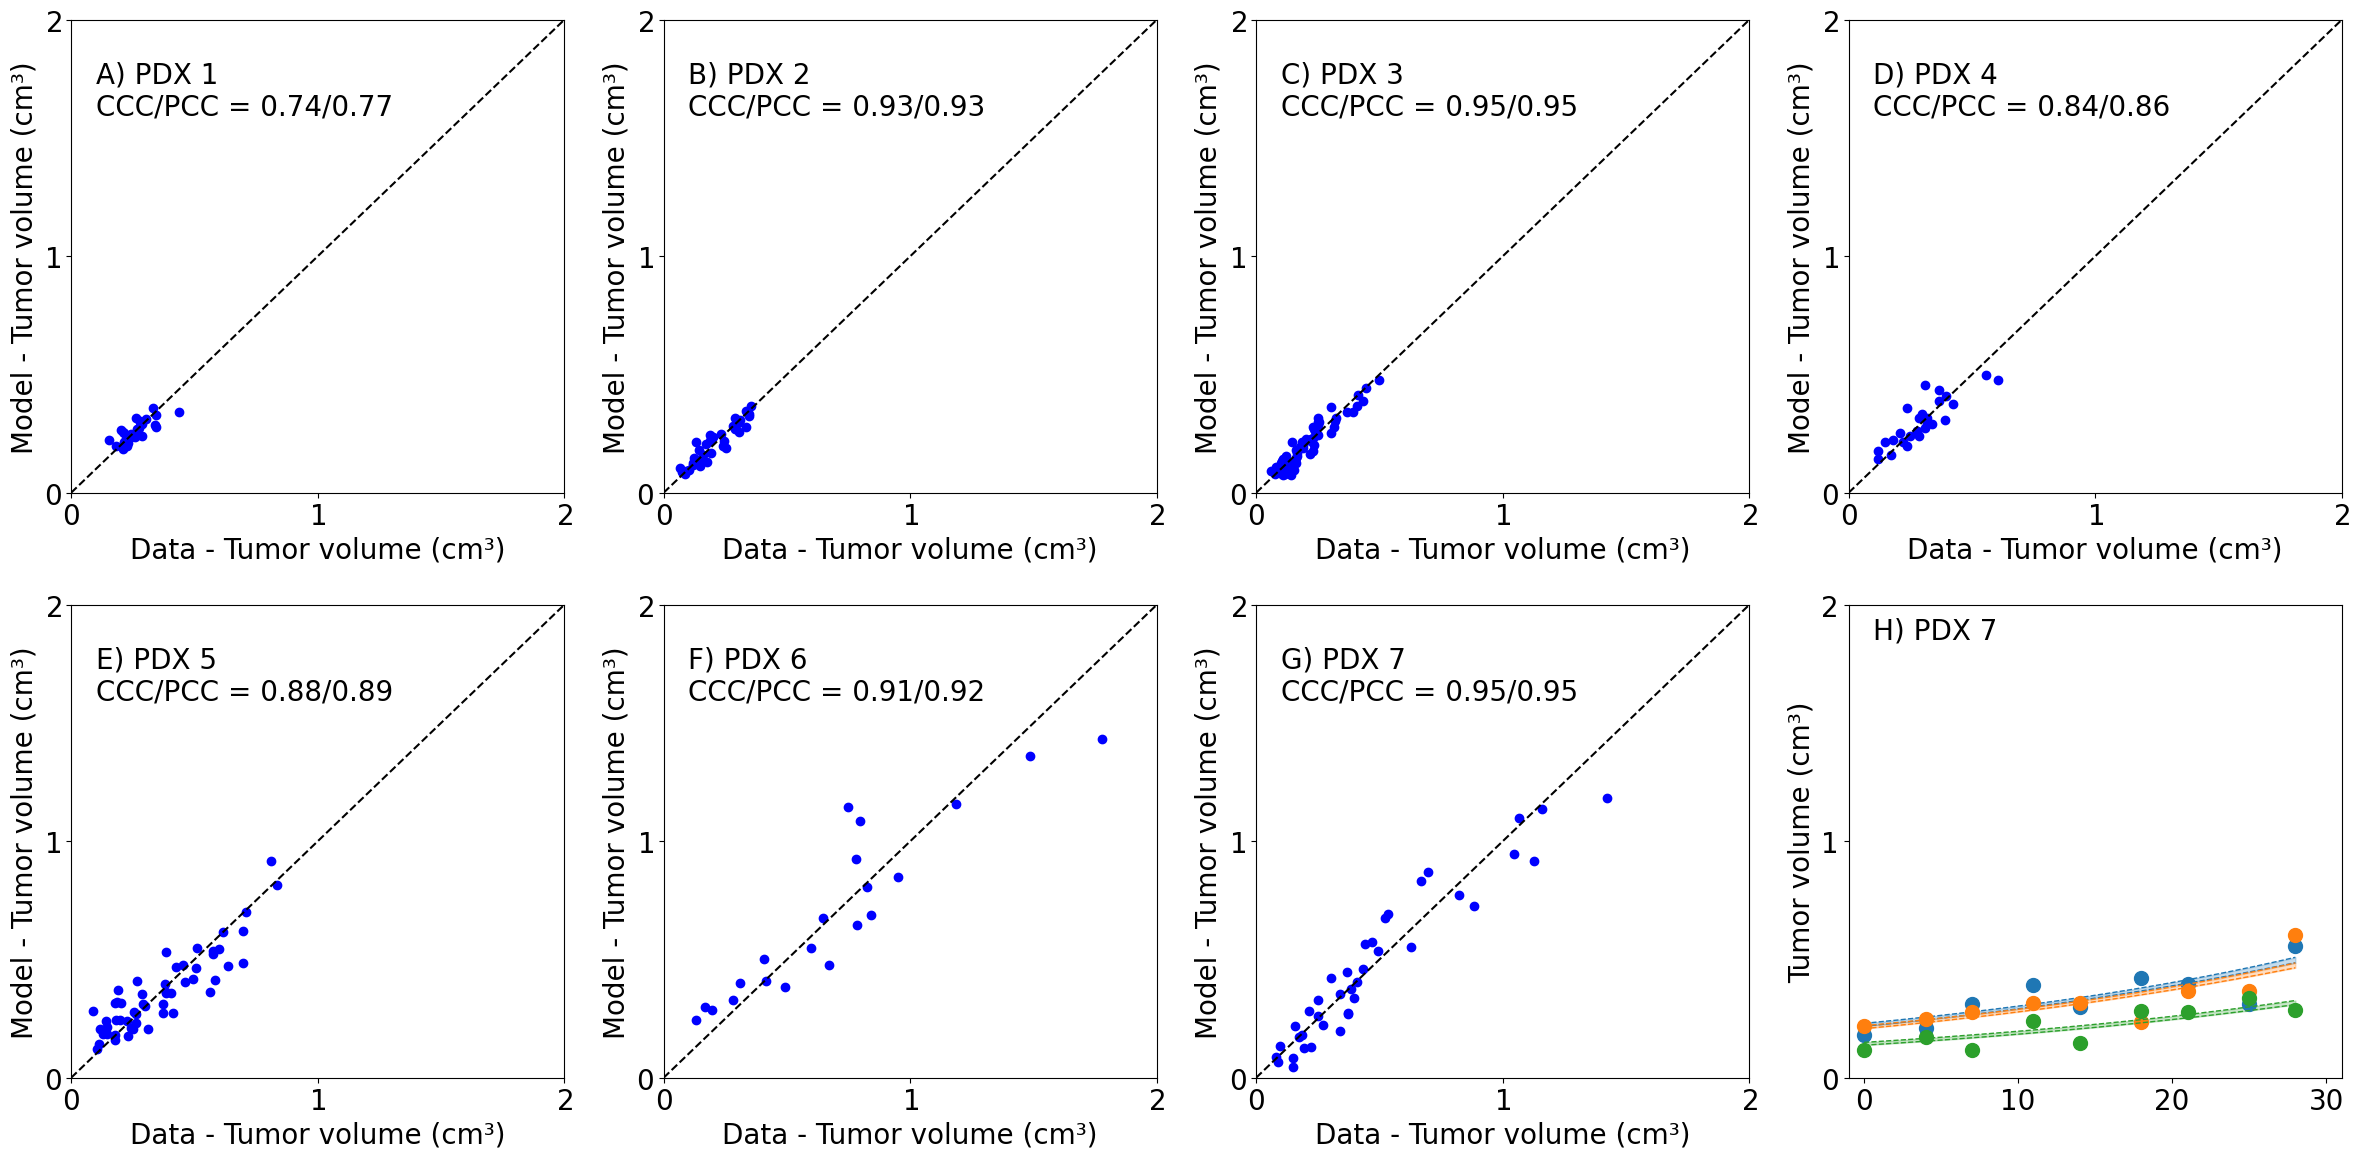

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import numpy as np
import string
import pickle

with open(f'./PaperFigures/all_scatterplot.pkl', 'rb') as f:
    all_scatterplot = pickle.load(f)

plt.rcParams['font.size'] = 20

cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total

fig = plt.figure(figsize=(24, 12))  # Wide figure
gs = gridspec.GridSpec(2, 8)  # 2 rows, 8 columns
axes = []

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))

max_value = 2
ticks = np.linspace(0, max_value, 3)

# Top row: use every other column (0, 2, 4, 6)
top_cols = [0, 2, 4, 6]
for i, col in enumerate(top_cols):
    ax = fig.add_subplot(gs[0, col:col+2])  # span 2 columns
    axes.append(ax)

# Bottom row: use inner 3 columns (2, 3, 4, 5, 6) → center over bottom 8 cols
bottom_cols = [0, 2, 4, 6]
for i, col in enumerate(bottom_cols):
    ax = fig.add_subplot(gs[1, col:col+2])  # span 2 columns each
    axes.append(ax)

# Plot data
for i, cell in enumerate(cells):
    ax = axes[i]
    matched_key = next((k for k in all_scatterplot if cell in k), None)
    if matched_key is None:
        continue

    E = all_scatterplot[matched_key]['exp'] / 1000
    M = all_scatterplot[matched_key]['model'] / 1000
    ax.plot(E, M, 'o', color='blue')

    identity = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='dashed', transform=ax.transAxes)
    ax.add_line(identity)

    ax.set_xlim((0, max_value))
    ax.set_ylim((0, max_value))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xlabel('Data - Tumor volume (cm³)')
    ax.set_ylabel('Model - Tumor volume (cm³)')
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    ax.text(0.05,.8,f'{string.ascii_uppercase[i]}) {labels[i]}\
            \nCCC/PCC = {all_scatterplot[matched_key]["ccc"]:.2f}/{all_scatterplot[matched_key]["pcc"]:.2f}'
            ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)

with open(f'./PaperFigures/control_MDA-BCM-IBC-103.pkl', 'rb') as f:
    tumor = pickle.load(f)

ax = axes[7]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Default color cycle

for i, k in enumerate(tumor):
    color = colors[i % len(colors)]  # Cycle if more than available
    ax.plot(tumor[k]['times'], np.array(tumor[k]['y_obs'])/1000, 'o', color=color, markersize=10, label=f'Data {k}')
    ax.fill_between(tumor[k]['t'], np.array(tumor[k]['min_pre'])/1000, np.array(tumor[k]['max_pre'])/1000, alpha=0.25, color=color, label=f'Model {k}')
    ax.plot(tumor[k]['t'], np.array(tumor[k]['min_pre'])/1000, linewidth=1, linestyle="--", color=color)
    ax.plot(tumor[k]['t'], np.array(tumor[k]['max_pre'])/1000, linewidth=1, linestyle="--", color=color)

ax.set_ylabel('Tumor volume (cm³)')
ax.set_ylim((0, max_value))
ax.set_yticks(ticks)
ax.set_xlim((-1, 31))
ax.text(0.05,.93,f'{string.ascii_uppercase[7]}) {labels[6]}'
            ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)
plt.tight_layout()
plt.savefig('./PaperFigures/figure02b.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

### Figure 6

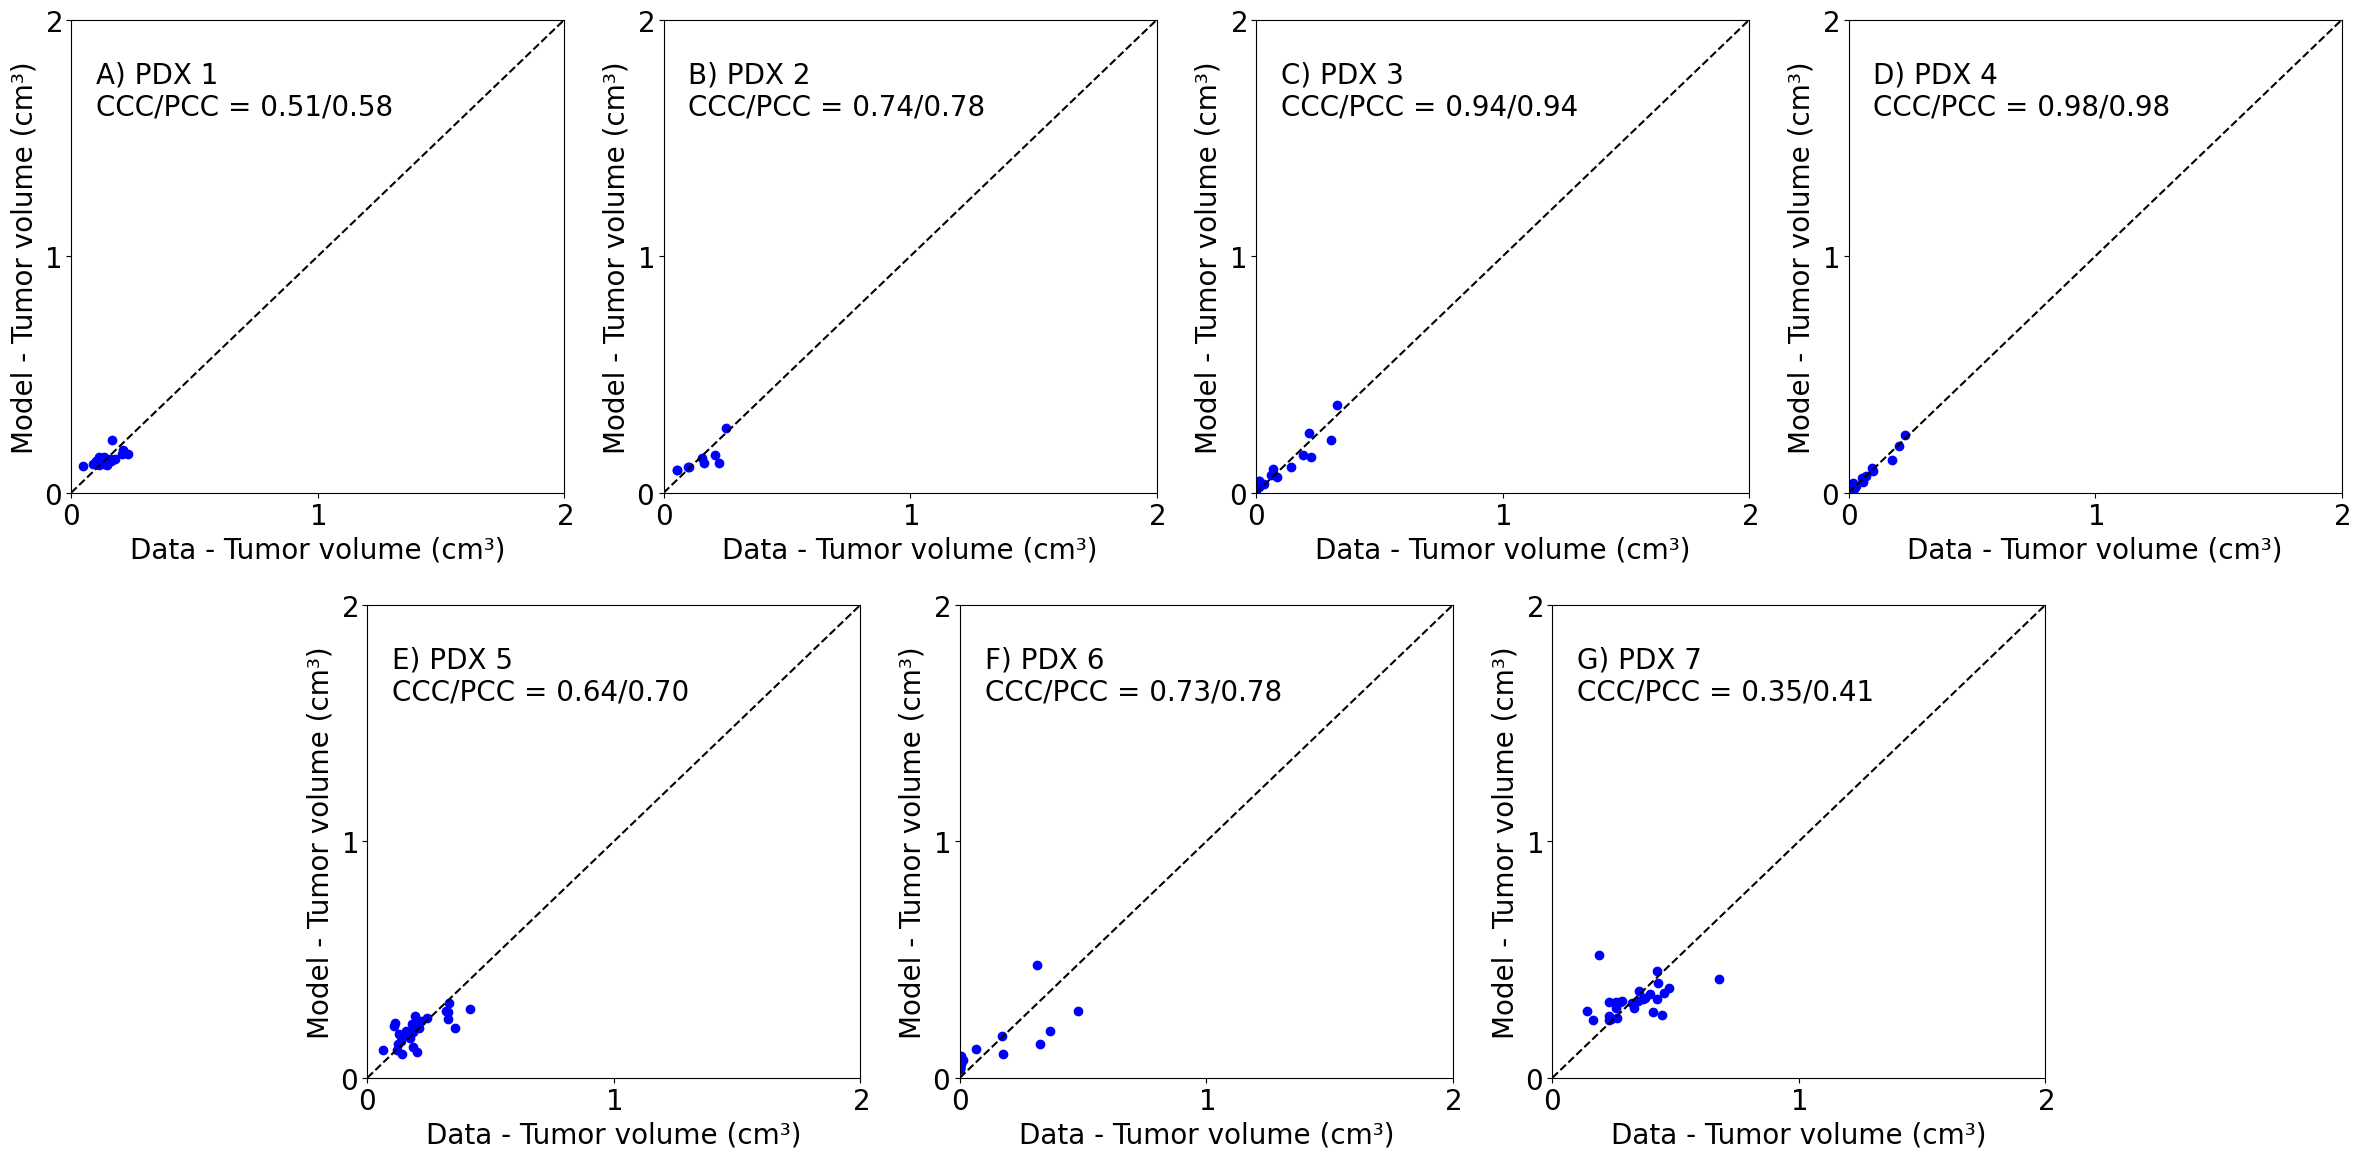

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import numpy as np
import string
import pickle

with open(f'./PaperFigures/treated_sas_all_scatterplot.pkl', 'rb') as f:
    all_scatterplot = pickle.load(f)

plt.rcParams['font.size'] = 20

cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total


fig = plt.figure(figsize=(24, 12))  # Wide figure
gs = gridspec.GridSpec(2, 8)  # 2 rows, 8 columns
axes = []

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))

max_value = 2
ticks = np.linspace(0, max_value, 3)

# Top row: use every other column (0, 2, 4, 6)
top_cols = [0, 2, 4, 6]
for i, col in enumerate(top_cols):
    ax = fig.add_subplot(gs[0, col:col+2])  # span 2 columns
    axes.append(ax)

# Bottom row: use inner 3 columns (2, 3, 4, 5, 6) → center over bottom 8 cols
bottom_cols = [1, 3, 5]
for i, col in enumerate(bottom_cols):
    ax = fig.add_subplot(gs[1, col:col+2])  # span 2 columns each
    axes.append(ax)
all_ccc = []
all_pcc = []
all_mape = []
# Plot data
for i, cell in enumerate(cells):
    ax = axes[i]
    matched_key = next((k for k in all_scatterplot if cell in k), None)
    if matched_key is None:
        continue

    E = all_scatterplot[matched_key]['exp'] / 1000
    M = all_scatterplot[matched_key]['model'] / 1000
    ax.plot(E, M, 'o', color='blue')

    identity = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='dashed', transform=ax.transAxes)
    ax.add_line(identity)

    ax.set_xlim((0, max_value))
    ax.set_ylim((0, max_value))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xlabel('Data - Tumor volume (cm³)')
    ax.set_ylabel('Model - Tumor volume (cm³)')
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    all_ccc.append(all_scatterplot[matched_key]["ccc"])
    all_pcc.append(all_scatterplot[matched_key]["pcc"])
    all_mape.append(all_scatterplot[matched_key]["mape"])
    ax.text(0.05,.8,f'{string.ascii_uppercase[i]}) {labels[i]}\
            \nCCC/PCC = {all_scatterplot[matched_key]["ccc"]:.2f}/{all_scatterplot[matched_key]["pcc"]:.2f}'
            ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)

plt.tight_layout()
plt.savefig('./PaperFigures/figure06a.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

In [5]:
import numpy as np

CCC = all_ccc

# Median
median_ccc = np.median(CCC)

# IQR (Interquartile Range)
q1 = np.percentile(CCC, 25)
q3 = np.percentile(CCC, 75)
iqr_ccc = q3 - q1

print(f"Median CCC: {median_ccc:.2f}")
print(f"IQR CCC: {iqr_ccc:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})")

CCC = all_pcc

# Median
median_ccc = np.median(CCC)

# IQR (Interquartile Range)
q1 = np.percentile(CCC, 25)
q3 = np.percentile(CCC, 75)
iqr_ccc = q3 - q1

print(f"Median PCC: {median_ccc:.2f}")
print(f"IQR PCC: {iqr_ccc:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})")

CCC = all_mape

# Median
median_ccc = np.median(CCC)

# IQR (Interquartile Range)
q1 = np.percentile(CCC, 25)
q3 = np.percentile(CCC, 75)
iqr_ccc = q3 - q1

print(f"Median MAPE: {median_ccc:.2f}")
print(f"IQR MAPE: {iqr_ccc:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})")


Median CCC: 0.73
IQR CCC: 0.26 (Q1: 0.58, Q3: 0.84)
Median PCC: 0.78
IQR PCC: 0.22 (Q1: 0.64, Q3: 0.86)
Median MAPE: 30.45
IQR MAPE: 73.30 (Q1: 26.70, Q3: 100.00)


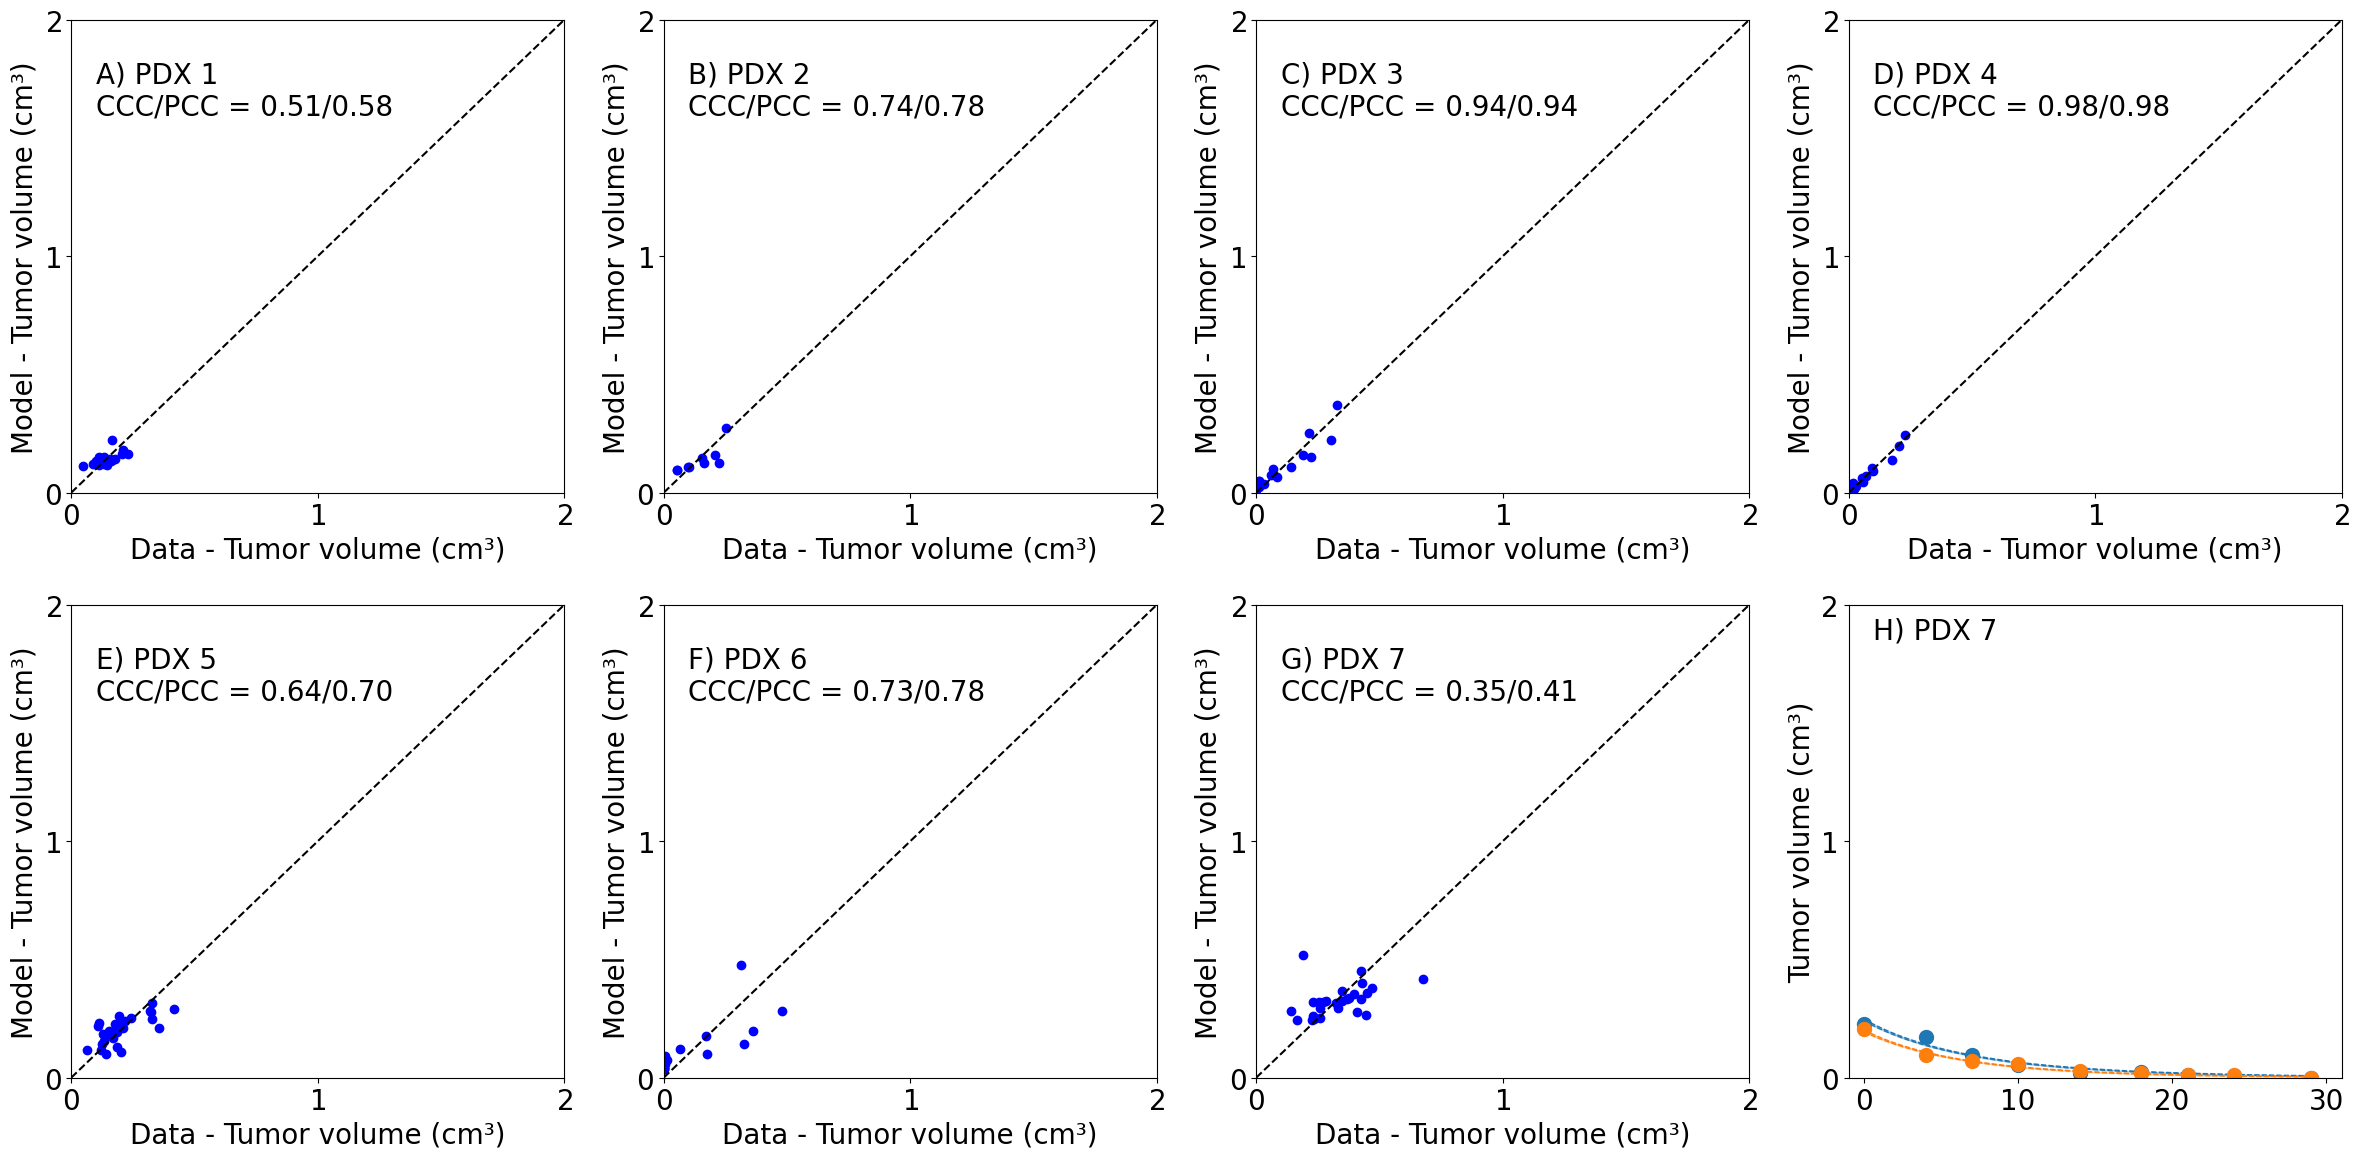

In [6]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import numpy as np
import string
import pickle

with open(f'./PaperFigures/treated_sas_all_scatterplot.pkl', 'rb') as f:
    all_scatterplot = pickle.load(f)

plt.rcParams['font.size'] = 20

cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total

fig = plt.figure(figsize=(24, 12))  # Wide figure
gs = gridspec.GridSpec(2, 8)  # 2 rows, 8 columns
axes = []

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))

max_value = 2
ticks = np.linspace(0, max_value, 3)

# Top row: use every other column (0, 2, 4, 6)
top_cols = [0, 2, 4, 6]
for i, col in enumerate(top_cols):
    ax = fig.add_subplot(gs[0, col:col+2])  # span 2 columns
    axes.append(ax)

# Bottom row: use inner 3 columns (2, 3, 4, 5, 6) → center over bottom 8 cols
bottom_cols = [0, 2, 4, 6]
for i, col in enumerate(bottom_cols):
    ax = fig.add_subplot(gs[1, col:col+2])  # span 2 columns each
    axes.append(ax)

# Plot data
for i, cell in enumerate(cells):
    ax = axes[i]
    matched_key = next((k for k in all_scatterplot if cell in k), None)
    if matched_key is None:
        continue

    E = all_scatterplot[matched_key]['exp'] / 1000
    M = all_scatterplot[matched_key]['model'] / 1000
    ax.plot(E, M, 'o', color='blue')

    identity = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='dashed', transform=ax.transAxes)
    ax.add_line(identity)

    ax.set_xlim((0, max_value))
    ax.set_ylim((0, max_value))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xlabel('Data - Tumor volume (cm³)')
    ax.set_ylabel('Model - Tumor volume (cm³)')
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    ax.text(0.05,.8,f'{string.ascii_uppercase[i]}) {labels[i]}\
            \nCCC/PCC = {all_scatterplot[matched_key]["ccc"]:.2f}/{all_scatterplot[matched_key]["pcc"]:.2f}'
            ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)

with open(f'./PaperFigures/treated_sas_MDA-BCM-IBC-103.pkl', 'rb') as f:
    tumor = pickle.load(f)

ax = axes[7]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Default color cycle

for i, k in enumerate(tumor):
    color = colors[i % len(colors)]  # Cycle if more than available
    ax.plot(tumor[k]['times'], np.array(tumor[k]['y_obs'])/1000, 'o', color=color, markersize=10, label=f'Data {k}')
    ax.fill_between(tumor[k]['t'], np.array(tumor[k]['min_pre'])/1000, np.array(tumor[k]['max_pre'])/1000, alpha=0.25, color=color, label=f'Model {k}')
    ax.plot(tumor[k]['t'], np.array(tumor[k]['min_pre'])/1000, linewidth=1, linestyle="--", color=color)
    ax.plot(tumor[k]['t'], np.array(tumor[k]['max_pre'])/1000, linewidth=1, linestyle="--", color=color)

ax.set_ylabel('Tumor volume (cm³)')
ax.set_ylim((0, max_value))
ax.set_yticks(ticks)
ax.set_xlim((-1, 31))
ax.text(0.05,.93,f'{string.ascii_uppercase[7]}) {labels[6]}'
            ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)
plt.tight_layout()
plt.savefig('./PaperFigures/figure06b.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

### Figure 3

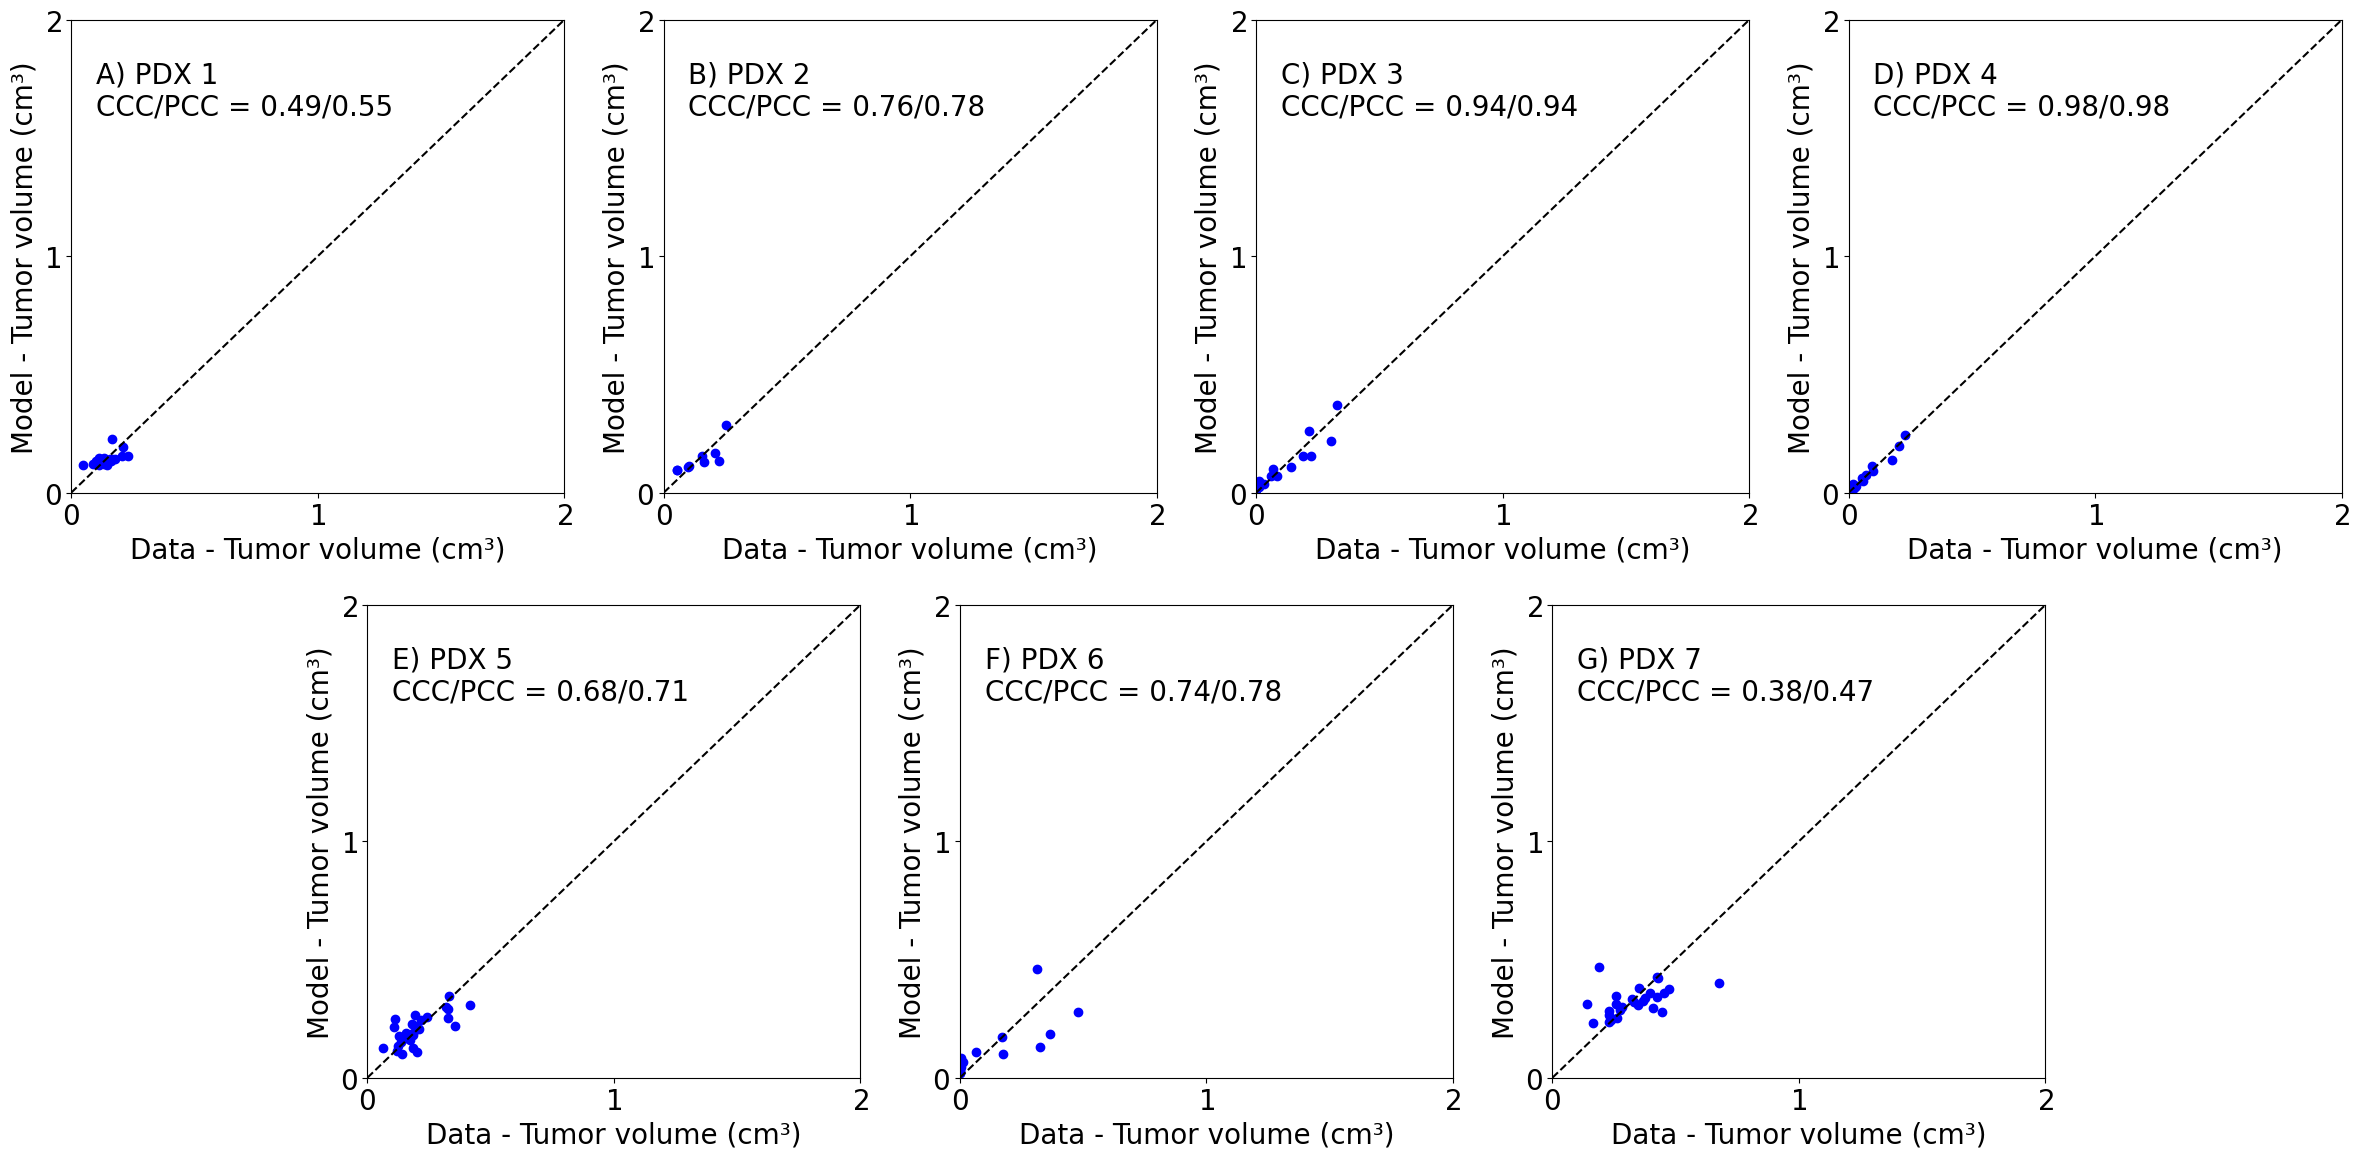

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import numpy as np
import string
import pickle

with open(f'./PaperFigures/treated_all_scatterplot.pkl', 'rb') as f:
    all_scatterplot = pickle.load(f)

plt.rcParams['font.size'] = 20

cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total

fig = plt.figure(figsize=(24, 12))  # Wide figure
gs = gridspec.GridSpec(2, 8)  # 2 rows, 8 columns
axes = []

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))

max_value = 2
ticks = np.linspace(0, max_value, 3)

# Top row: use every other column (0, 2, 4, 6)
top_cols = [0, 2, 4, 6]
for i, col in enumerate(top_cols):
    ax = fig.add_subplot(gs[0, col:col+2])  # span 2 columns
    axes.append(ax)

# Bottom row: use inner 3 columns (2, 3, 4, 5, 6) → center over bottom 8 cols
bottom_cols = [1, 3, 5]
for i, col in enumerate(bottom_cols):
    ax = fig.add_subplot(gs[1, col:col+2])  # span 2 columns each
    axes.append(ax)

# Plot data
all_ccc = []
all_pcc = []
all_mape = []
for i, cell in enumerate(cells):
    ax = axes[i]
    matched_key = next((k for k in all_scatterplot if cell in k), None)
    if matched_key is None:
        continue

    E = all_scatterplot[matched_key]['exp'] / 1000
    M = all_scatterplot[matched_key]['model'] / 1000
    ax.plot(E, M, 'o', color='blue')

    identity = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='dashed', transform=ax.transAxes)
    ax.add_line(identity)

    ax.set_xlim((0, max_value))
    ax.set_ylim((0, max_value))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xlabel('Data - Tumor volume (cm³)')
    ax.set_ylabel('Model - Tumor volume (cm³)')
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    all_ccc.append(all_scatterplot[matched_key]["ccc"])
    all_pcc.append(all_scatterplot[matched_key]["pcc"])
    all_mape.append(all_scatterplot[matched_key]["mape"])
    ax.text(0.05,.8,f'{string.ascii_uppercase[i]}) {labels[i]}\
            \nCCC/PCC = {all_scatterplot[matched_key]["ccc"]:.2f}/{all_scatterplot[matched_key]["pcc"]:.2f}'
            ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)

plt.tight_layout()
plt.savefig('./PaperFigures/figure03a.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

In [8]:
import numpy as np

CCC = all_ccc

# Median
median_ccc = np.median(CCC)

# IQR (Interquartile Range)
q1 = np.percentile(CCC, 25)
q3 = np.percentile(CCC, 75)
iqr_ccc = q3 - q1

print(f"Median CCC: {median_ccc:.2f}")
print(f"IQR CCC: {iqr_ccc:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})")

CCC = all_pcc

# Median
median_ccc = np.median(CCC)

# IQR (Interquartile Range)
q1 = np.percentile(CCC, 25)
q3 = np.percentile(CCC, 75)
iqr_ccc = q3 - q1

print(f"Median PCC: {median_ccc:.2f}")
print(f"IQR PCC: {iqr_ccc:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})")

CCC = all_mape

# Median
median_ccc = np.median(CCC)

# IQR (Interquartile Range)
q1 = np.percentile(CCC, 25)
q3 = np.percentile(CCC, 75)
iqr_ccc = q3 - q1

print(f"Median MAPE: {median_ccc:.2f}")
print(f"IQR MAPE: {iqr_ccc:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})")


Median CCC: 0.74
IQR CCC: 0.26 (Q1: 0.59, Q3: 0.85)
Median PCC: 0.78
IQR PCC: 0.23 (Q1: 0.63, Q3: 0.86)
Median MAPE: 31.22
IQR MAPE: 73.42 (Q1: 26.58, Q3: 100.00)


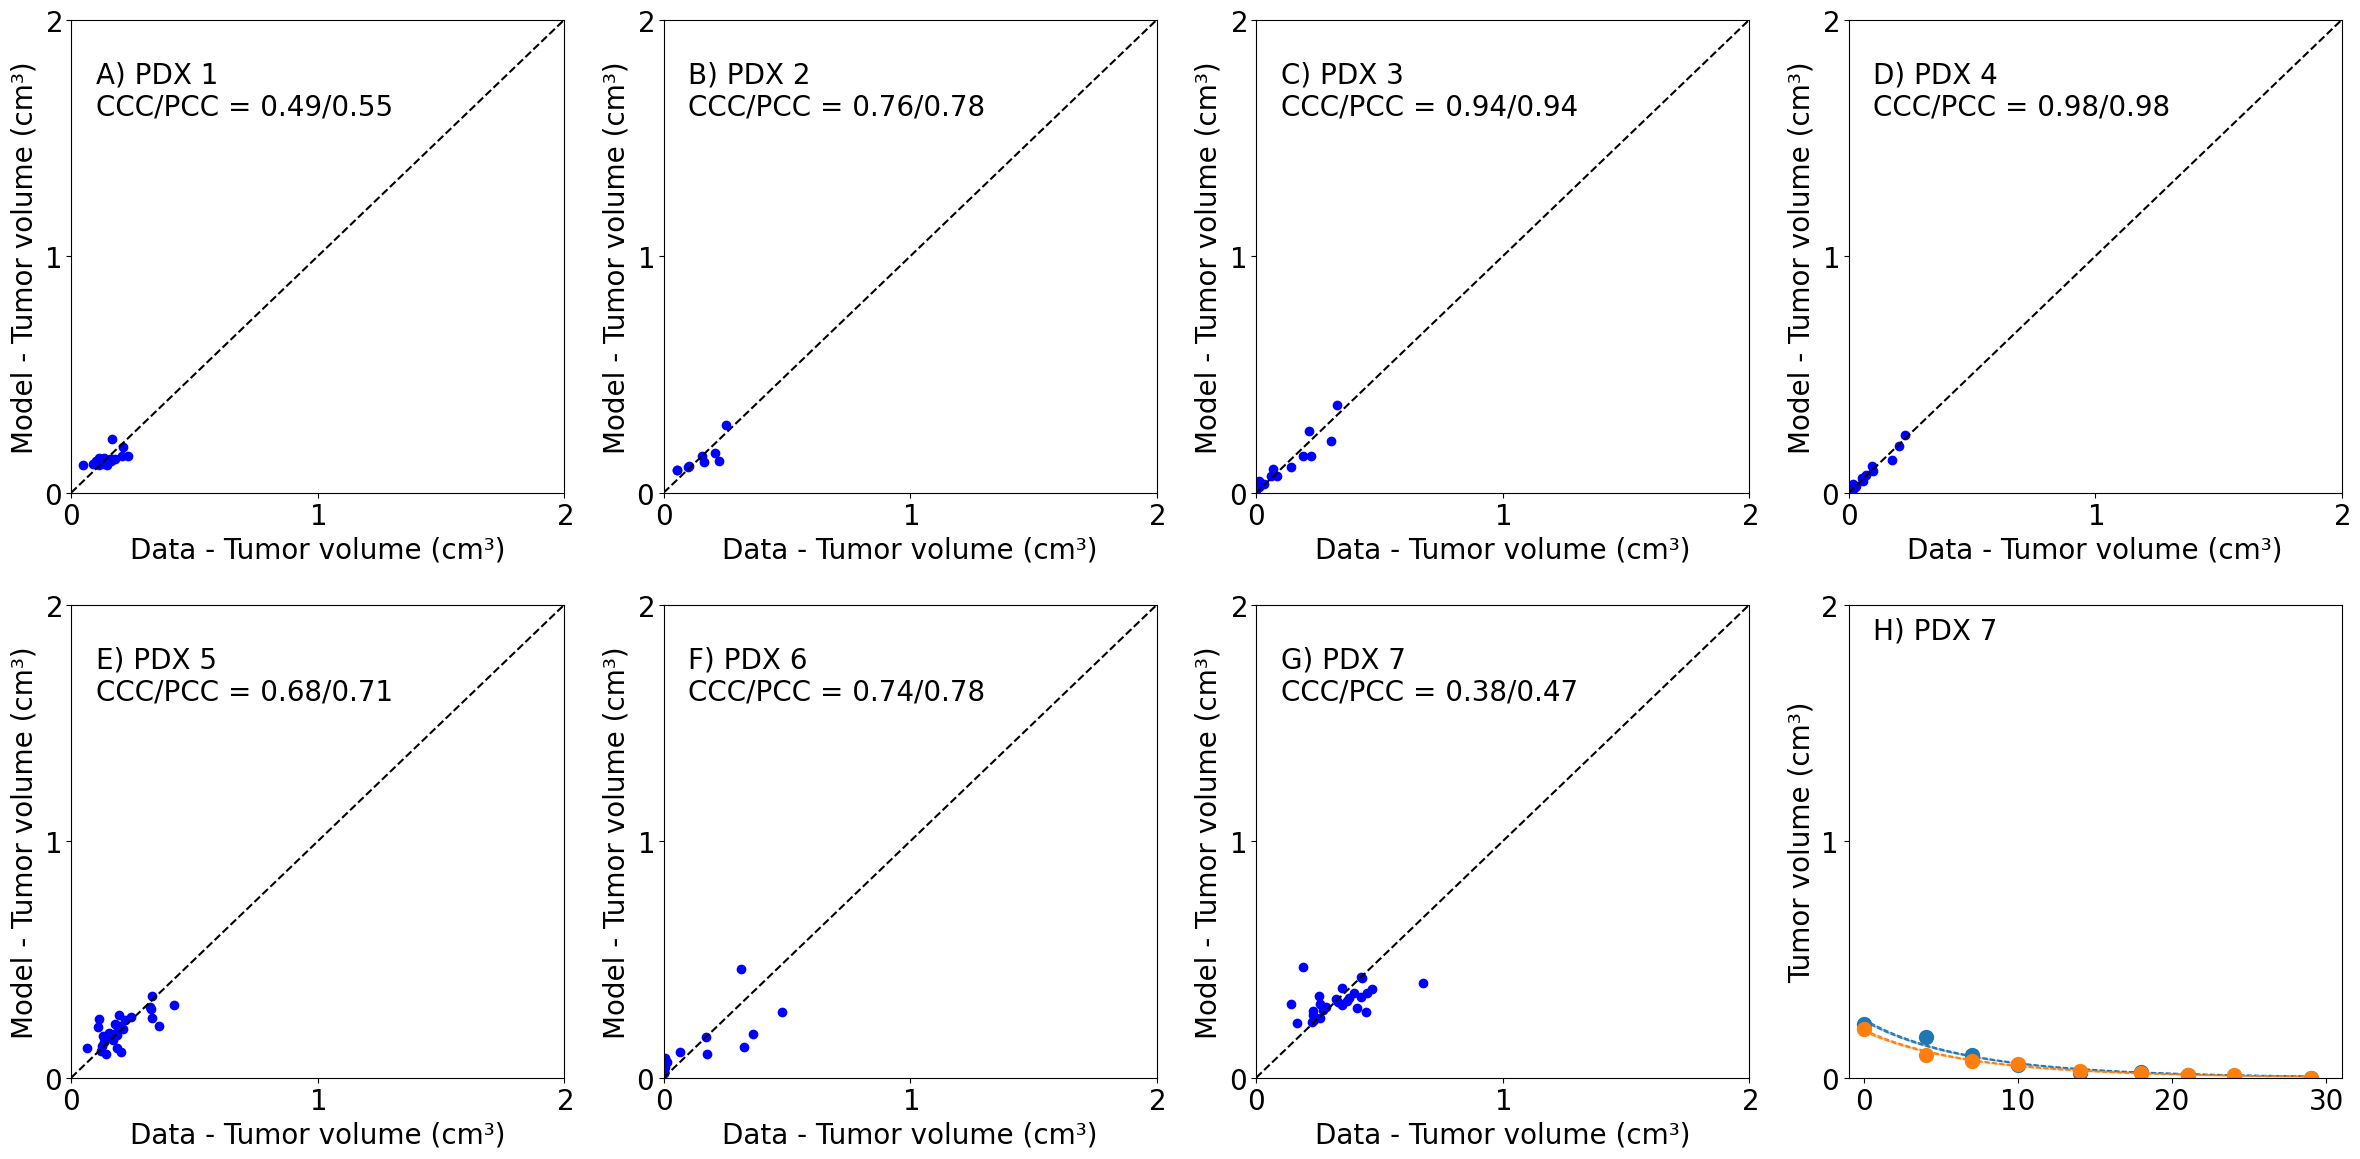

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import numpy as np
import string
import pickle

with open(f'./PaperFigures/treated_all_scatterplot.pkl', 'rb') as f:
    all_scatterplot = pickle.load(f)

plt.rcParams['font.size'] = 20

cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total

fig = plt.figure(figsize=(24, 12))  # Wide figure
gs = gridspec.GridSpec(2, 8)  # 2 rows, 8 columns
axes = []

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))

max_value = 2
ticks = np.linspace(0, max_value, 3)

# Top row: use every other column (0, 2, 4, 6)
top_cols = [0, 2, 4, 6]
for i, col in enumerate(top_cols):
    ax = fig.add_subplot(gs[0, col:col+2])  # span 2 columns
    axes.append(ax)

# Bottom row: use inner 3 columns (2, 3, 4, 5, 6) → center over bottom 8 cols
bottom_cols = [0, 2, 4, 6]
for i, col in enumerate(bottom_cols):
    ax = fig.add_subplot(gs[1, col:col+2])  # span 2 columns each
    axes.append(ax)

# Plot data
for i, cell in enumerate(cells):
    ax = axes[i]
    matched_key = next((k for k in all_scatterplot if cell in k), None)
    if matched_key is None:
        continue

    E = all_scatterplot[matched_key]['exp'] / 1000
    M = all_scatterplot[matched_key]['model'] / 1000
    ax.plot(E, M, 'o', color='blue')

    identity = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='dashed', transform=ax.transAxes)
    ax.add_line(identity)

    ax.set_xlim((0, max_value))
    ax.set_ylim((0, max_value))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xlabel('Data - Tumor volume (cm³)')
    ax.set_ylabel('Model - Tumor volume (cm³)')
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    ax.text(0.05,.8,f'{string.ascii_uppercase[i]}) {labels[i]}\
            \nCCC/PCC = {all_scatterplot[matched_key]["ccc"]:.2f}/{all_scatterplot[matched_key]["pcc"]:.2f}'
            ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)

with open(f'./PaperFigures/treated_MDA-BCM-IBC-103.pkl', 'rb') as f:
    tumor = pickle.load(f)

ax = axes[7]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Default color cycle

for i, k in enumerate(tumor):
    color = colors[i % len(colors)]  # Cycle if more than available
    ax.plot(tumor[k]['times'], np.array(tumor[k]['y_obs'])/1000, 'o', color=color, markersize=10, label=f'Data {k}')
    ax.fill_between(tumor[k]['t'], np.array(tumor[k]['min_pre'])/1000, np.array(tumor[k]['max_pre'])/1000, alpha=0.25, color=color, label=f'Model {k}')
    ax.plot(tumor[k]['t'], np.array(tumor[k]['min_pre'])/1000, linewidth=1, linestyle="--", color=color)
    ax.plot(tumor[k]['t'], np.array(tumor[k]['max_pre'])/1000, linewidth=1, linestyle="--", color=color)

ax.set_ylabel('Tumor volume (cm³)')
ax.set_ylim((0, max_value))
ax.set_yticks(ticks)
ax.set_xlim((-1, 31))
ax.text(0.05,.93,f'{string.ascii_uppercase[7]}) {labels[6]}'
            ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)
plt.tight_layout()
plt.savefig('./PaperFigures/figure03b.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

### Figure 5

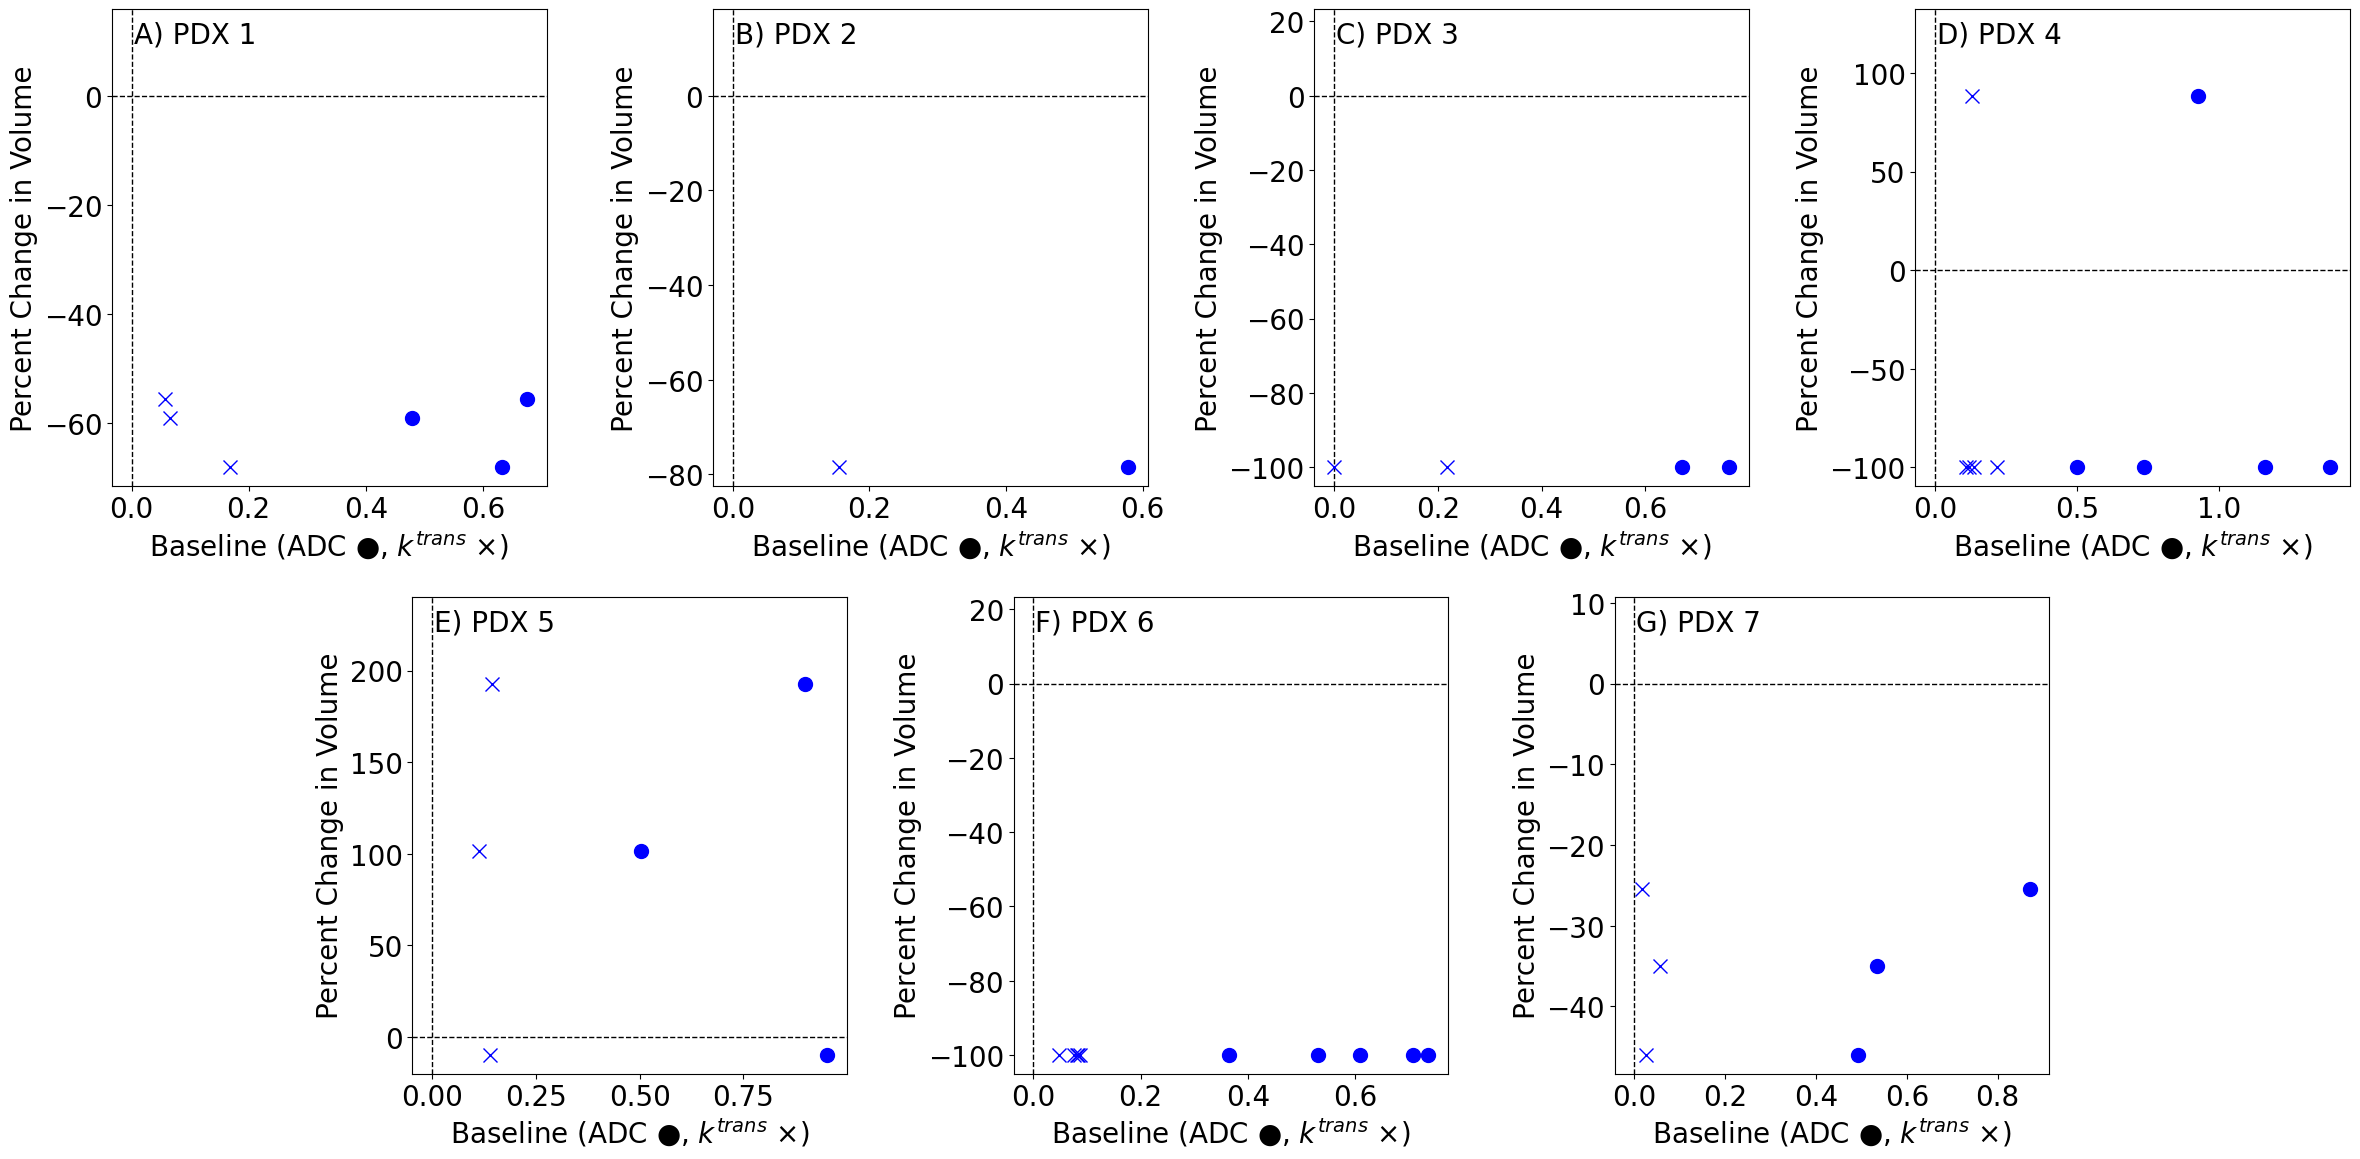

In [10]:
#from matplotlib.lines import Line2D  # Import Line2D to create custom legend handles without markers

with open(f'./PaperFigures/bio_dict.pkl', 'rb') as f:
    data_dict = pickle.load(f)

nCols=4
show=True
save=False
verbose=False
baseline = True

plt.rcParams['font.size'] = 20

cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total

fig = plt.figure(figsize=(24, 12))  # Wide figure
gs = gridspec.GridSpec(2, 8)  # 2 rows, 8 columns
axes = []

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))

max_value = 2
ticks = np.linspace(0, max_value, 3)

# Top row: use every other column (0, 2, 4, 6)
top_cols = [0, 2, 4, 6]
for i, col in enumerate(top_cols):
    ax = fig.add_subplot(gs[0, col:col+2])  # span 2 columns
    axes.append(ax)

# Bottom row: use inner 3 columns (2, 3, 4, 5, 6) → center over bottom 8 cols
bottom_cols = [1, 3, 5]
for i, col in enumerate(bottom_cols):
    ax = fig.add_subplot(gs[1, col:col+2])  # span 2 columns each
    axes.append(ax)

"""
Plot MRI data from the nested data_dict.

Parameters:
  data_dict: Nested dictionary with the following structure:
      {
        cell_name: {
            mouse_id: {
                'ADC': array of ADC measurements,
                'Ve': array of Ve measurements,
                'Ktrans': array of Ktrans measurements,
                'tumor_volumes': array of tumor volume measurements,
                'time_measured': array of days differences (e.g., [days_t2_minus_t1, days_t3_minus_t1])
            },
            ...
        },
        ...
      }
  nCols: Number of columns for subplots.
  show: Boolean flag to display the plot.
  save: Boolean flag to save the plot to a file.
  fontsize: Font size for labels (unused in this snippet, but can be applied in future modifications).
  figure_name: Name of the file to save the figure if save=True.
  verbose: If True, prints additional diagnostic information for extreme percent changes.
"""

# # Calculate the number of scenarios (one per cell) for which a subplot is needed.
# # Note: Using data_dict (not date_dict) to avoid potential typos.
# nScenarios = len(data_dict)  

# # Calculate the required number of rows based on the number of scenarios and columns.
# nRows = int(np.ceil(nScenarios / nCols))

# # Create a figure and a grid of subplots with the determined number of rows and columns.
# # The figsize is set proportionally (7 inches per subplot).
# fig, axes = plt.subplots(nrows=nRows, ncols=nCols, figsize=(nCols * 7, nRows * 7))
# # Flatten the axes array to simplify indexing.
# axes = axes.ravel()

# Plot data
for i, cell in enumerate(cells):
    ax = axes[i]
    ax.text(0.05,.93,f'{string.ascii_uppercase[i]}) {labels[i]}'
            ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)
    matched_key = next((k for k in data_dict if cell in k), None)
    if matched_key is None:
        continue
    cell_name = matched_key

    # E = all_scatterplot[matched_key]['exp'] / 1000
    # M = all_scatterplot[matched_key]['model'] / 1000
    # ax.plot(E, M, 'o', color='blue')

    # identity = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='dashed', transform=ax.transAxes)
    # ax.add_line(identity)

    # ax.set_xlim((0, max_value))
    # ax.set_ylim((0, max_value))
    # ax.set_xticks(ticks)
    # ax.set_yticks(ticks)
    # ax.set_xlabel('Data - Tumor volume (cm³)')
    # ax.set_ylabel('Model - Tumor volume (cm³)')
    # ax.xaxis.set_major_formatter(formatter)
    # ax.yaxis.set_major_formatter(formatter)
    # ax.text(0.05,.8,f'{string.ascii_uppercase[i]}) {labels[i]}\
    #         \nCCC/PCC = {all_scatterplot[matched_key]["ccc"]:.2f}/{all_scatterplot[matched_key]["pcc"]:.2f}\
    #         \nMAPE = {all_scatterplot[matched_key]["mape"]:.2f}%'
    #         ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)

# # Loop through each cell in the data_dict (each cell corresponds to one subplot).
# for i, cell_name in enumerate(data_dict):
#     ax = axes[i]
#     # Draw vertical and horizontal dashed lines at x=0 and y=0 respectively.
    ax.axvline(x=0, color='black', linewidth=1, linestyle='--')
    ax.axhline(y=0, color='black', linewidth=1, linestyle='--')
    
    # Set axis labels and title.
    ax.set_ylabel('Percent Change in Volume')
    ax.set_xlabel('Baseline (ADC ●, $k^{trans}$ ×)')
    #ax.set_title(cell_name)

#     # Create dummy legend handles with no markers (linestyle set to "none")
#     legend_elements = [
#         Line2D([], [], linestyle="none", label="On-Treatment"),
#         Line2D([], [], linestyle="none", label="Post-Treatment")
#     ]
    
#     # Create the legend at the top right without a frame.
#     leg = ax.legend(handles=legend_elements, loc='upper right', frameon=False)
    
#     # Set the text color for each legend item individually.
#     leg.get_texts()[0].set_color("red")
#     leg.get_texts()[1].set_color("blue")

    # For each mouse within the current cell:
    for mouse_id in data_dict[cell_name]:
        # Loop through each time measurement (t corresponds to measurement index).
        for t, day_pos in enumerate(data_dict[cell_name][mouse_id]['time_measured']):
            if t == 0:
                continue
            # Only consider measurements where the day difference is positive.
            if day_pos > 0:
                # Calculate percent change for ADC: change relative to the pre-treatment (first element).
                if baseline:
                    percent_ADC = data_dict[cell_name][mouse_id]['ADC'][0]
                else:
                    percent_ADC = ((data_dict[cell_name][mouse_id]['ADC'][t+1] / data_dict[cell_name][mouse_id]['ADC'][0]) - 1) * 100
                # Similarly, calculate percent change for Ve.
                if baseline:
                    percent_Ve = data_dict[cell_name][mouse_id]['Ve'][0]
                else:
                    percent_Ve = ((data_dict[cell_name][mouse_id]['Ve'][t+1] / data_dict[cell_name][mouse_id]['Ve'][0]) - 1) * 100
                # Calculate percent change for Ktrans.
                if baseline:
                    percent_Ktrans = data_dict[cell_name][mouse_id]['Ktrans'][0]
                else:
                    percent_Ktrans = ((data_dict[cell_name][mouse_id]['Ktrans'][t+1] / data_dict[cell_name][mouse_id]['Ktrans'][0]) - 1) * 100
                # Calculate percent change for tumor volume.
                percent_vol = ((data_dict[cell_name][mouse_id]['tumor_volumes'][t+1] / data_dict[cell_name][mouse_id]['tumor_volumes'][0]) - 1) * 100
                
                # Plot ADC percent change vs tumor volume percent change.
                # Use red markers for the first measurement (t==0) and blue for subsequent measurements.
                ax.plot(percent_ADC, percent_vol, marker='o', color='red' if t == 0 else 'blue', markersize=10)
                # Plot Ve percent change vs tumor volume percent change.
                # Using an empty square marker (marker 's' with no face color).
                #ax.plot(percent_Ve, percent_vol, marker='s', markerfacecolor='none', color='red' if t == 0 else 'blue', markersize=10)
                # Plot Ktrans percent change vs tumor volume percent change.
                # Using an 'x' marker.
                ax.plot(percent_Ktrans, percent_vol, marker='x', color='red' if t == 0 else 'blue', markersize=10)
                
                # If verbose is enabled, check for extreme changes and print diagnostic info.
                if verbose:
                    if np.abs(percent_ADC) > 100 or np.abs(percent_Ve) > 100 or np.abs(percent_Ktrans) > 100:
                        print(f"PDX: {cell_name}, Mouse: {mouse_id}")
                        print(f"    ADC: {data_dict[cell_name][mouse_id]['ADC']} {percent_ADC} {t}")
                        print(f"    Ve: {data_dict[cell_name][mouse_id]['Ve']} {percent_Ve} {t}")
                        print(f"    Ktrans: {data_dict[cell_name][mouse_id]['Ktrans']} {percent_Ktrans} {t}")
                        print(f"    Time Measured: {data_dict[cell_name][mouse_id]['time_measured']}")
                        print(f"    Tumor volumes: {data_dict[cell_name][mouse_id]['tumor_volumes']}\n\n")

    y_min, y_max = ax.get_ylim()  # Get the current y-axis limits
    ax.set_ylim(y_min, y_max + (y_max-y_min)/6)  # Set the new upper limit 10% higher


plt.tight_layout()
plt.savefig('./PaperFigures/figure05a.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

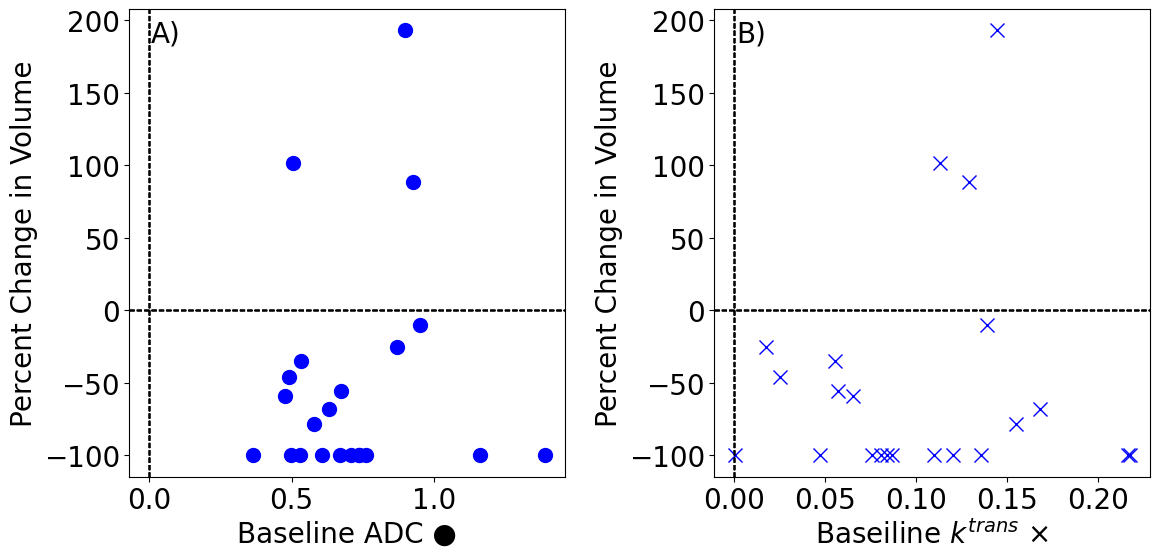

In [11]:
#from matplotlib.lines import Line2D  # Import Line2D to create custom legend handles without markers

with open(f'./PaperFigures/bio_dict.pkl', 'rb') as f:
    data_dict = pickle.load(f)

nCols=4
show=True
save=False
verbose=False
baseline = True

plt.rcParams['font.size'] = 20

cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes = axes.ravel()  # Flatten the axes array for easier indexing

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 2))

"""
Plot MRI data from the nested data_dict.

Parameters:
  data_dict: Nested dictionary with the following structure:
      {
        cell_name: {
            mouse_id: {
                'ADC': array of ADC measurements,
                'Ve': array of Ve measurements,
                'Ktrans': array of Ktrans measurements,
                'tumor_volumes': array of tumor volume measurements,
                'time_measured': array of days differences (e.g., [days_t2_minus_t1, days_t3_minus_t1])
            },
            ...
        },
        ...
      }
  nCols: Number of columns for subplots.
  show: Boolean flag to display the plot.
  save: Boolean flag to save the plot to a file.
  fontsize: Font size for labels (unused in this snippet, but can be applied in future modifications).
  figure_name: Name of the file to save the figure if save=True.
  verbose: If True, prints additional diagnostic information for extreme percent changes.
"""

# # Calculate the number of scenarios (one per cell) for which a subplot is needed.
# # Note: Using data_dict (not date_dict) to avoid potential typos.
# nScenarios = len(data_dict)  

# # Calculate the required number of rows based on the number of scenarios and columns.
# nRows = int(np.ceil(nScenarios / nCols))

# # Create a figure and a grid of subplots with the determined number of rows and columns.
# # The figsize is set proportionally (7 inches per subplot).
# fig, axes = plt.subplots(nrows=nRows, ncols=nCols, figsize=(nCols * 7, nRows * 7))
# # Flatten the axes array to simplify indexing.
# axes = axes.ravel()

# Plot data
ax = axes[0]
ax.text(0.05,.93,f'{string.ascii_uppercase[0]})' ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)
for i, cell in enumerate(cells):   
    matched_key = next((k for k in data_dict if cell in k), None)
    if matched_key is None:
        continue
    cell_name = matched_key

    ax.axvline(x=0, color='black', linewidth=1, linestyle='--')
    ax.axhline(y=0, color='black', linewidth=1, linestyle='--')
    
    # Set axis labels and title.
    ax.set_ylabel('Percent Change in Volume')
    ax.set_xlabel('Baseline ADC ●')

    # For each mouse within the current cell:
    for mouse_id in data_dict[cell_name]:
        # Loop through each time measurement (t corresponds to measurement index).
        for t, day_pos in enumerate(data_dict[cell_name][mouse_id]['time_measured']):
            if t == 0:
                continue
            # Only consider measurements where the day difference is positive.
            if day_pos > 0:
                # Calculate percent change for ADC: change relative to the pre-treatment (first element).
                if baseline:
                    percent_ADC = data_dict[cell_name][mouse_id]['ADC'][0]
                else:
                    percent_ADC = ((data_dict[cell_name][mouse_id]['ADC'][t+1] / data_dict[cell_name][mouse_id]['ADC'][0]) - 1) * 100
                # Similarly, calculate percent change for Ve.
                if baseline:
                    percent_Ve = data_dict[cell_name][mouse_id]['Ve'][0]
                else:
                    percent_Ve = ((data_dict[cell_name][mouse_id]['Ve'][t+1] / data_dict[cell_name][mouse_id]['Ve'][0]) - 1) * 100
                # Calculate percent change for Ktrans.
                if baseline:
                    percent_Ktrans = data_dict[cell_name][mouse_id]['Ktrans'][0]
                else:
                    percent_Ktrans = ((data_dict[cell_name][mouse_id]['Ktrans'][t+1] / data_dict[cell_name][mouse_id]['Ktrans'][0]) - 1) * 100
                # Calculate percent change for tumor volume.
                percent_vol = ((data_dict[cell_name][mouse_id]['tumor_volumes'][t+1] / data_dict[cell_name][mouse_id]['tumor_volumes'][0]) - 1) * 100
                
                # Plot ADC percent change vs tumor volume percent change.
                # Use red markers for the first measurement (t==0) and blue for subsequent measurements.
                ax.plot(percent_ADC, percent_vol, marker='o', color='red' if t == 0 else 'blue', markersize=10)
                # Plot Ve percent change vs tumor volume percent change.
                # Using an empty square marker (marker 's' with no face color).
                #ax.plot(percent_Ve, percent_vol, marker='s', markerfacecolor='none', color='red' if t == 0 else 'blue', markersize=10)
                # Plot Ktrans percent change vs tumor volume percent change.
                # Using an 'x' marker.
                #ax.plot(percent_Ktrans, percent_vol, marker='x', color='red' if t == 0 else 'blue', markersize=10)
            
ax = axes[1]
ax.text(0.05,.93,f'{string.ascii_uppercase[1]})' ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)
for i, cell in enumerate(cells):   
    matched_key = next((k for k in data_dict if cell in k), None)
    if matched_key is None:
        continue
    cell_name = matched_key

    ax.axvline(x=0, color='black', linewidth=1, linestyle='--')
    ax.axhline(y=0, color='black', linewidth=1, linestyle='--')
    
    # Set axis labels and title.
    ax.set_ylabel('Percent Change in Volume')
    ax.set_xlabel('Baseiline $k^{trans}$ ×')

    # For each mouse within the current cell:
    for mouse_id in data_dict[cell_name]:
        # Loop through each time measurement (t corresponds to measurement index).
        for t, day_pos in enumerate(data_dict[cell_name][mouse_id]['time_measured']):
            if t == 0:
                continue
            # Only consider measurements where the day difference is positive.
            if day_pos > 0:
                # Calculate percent change for ADC: change relative to the pre-treatment (first element).
                if baseline:
                    percent_ADC = data_dict[cell_name][mouse_id]['ADC'][0]
                else:
                    percent_ADC = ((data_dict[cell_name][mouse_id]['ADC'][t+1] / data_dict[cell_name][mouse_id]['ADC'][0]) - 1) * 100
                # Similarly, calculate percent change for Ve.
                if baseline:
                    percent_Ve = data_dict[cell_name][mouse_id]['Ve'][0]
                else:
                    percent_Ve = ((data_dict[cell_name][mouse_id]['Ve'][t+1] / data_dict[cell_name][mouse_id]['Ve'][0]) - 1) * 100
                # Calculate percent change for Ktrans.
                if baseline:
                    percent_Ktrans = data_dict[cell_name][mouse_id]['Ktrans'][0]
                else:
                    percent_Ktrans = ((data_dict[cell_name][mouse_id]['Ktrans'][t+1] / data_dict[cell_name][mouse_id]['Ktrans'][0]) - 1) * 100
                # Calculate percent change for tumor volume.
                percent_vol = ((data_dict[cell_name][mouse_id]['tumor_volumes'][t+1] / data_dict[cell_name][mouse_id]['tumor_volumes'][0]) - 1) * 100
                
                # Plot ADC percent change vs tumor volume percent change.
                # Use red markers for the first measurement (t==0) and blue for subsequent measurements.
                #ax.plot(percent_ADC, percent_vol, marker='o', color='red' if t == 0 else 'blue', markersize=10)
                # Plot Ve percent change vs tumor volume percent change.
                # Using an empty square marker (marker 's' with no face color).
                #ax.plot(percent_Ve, percent_vol, marker='s', markerfacecolor='none', color='red' if t == 0 else 'blue', markersize=10)
                # Plot Ktrans percent change vs tumor volume percent change.
                # Using an 'x' marker.
                ax.plot(percent_Ktrans, percent_vol, marker='x', color='red' if t == 0 else 'blue', markersize=10)

plt.tight_layout()
plt.savefig('./PaperFigures/figure05b.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

### Figures S1 and S2

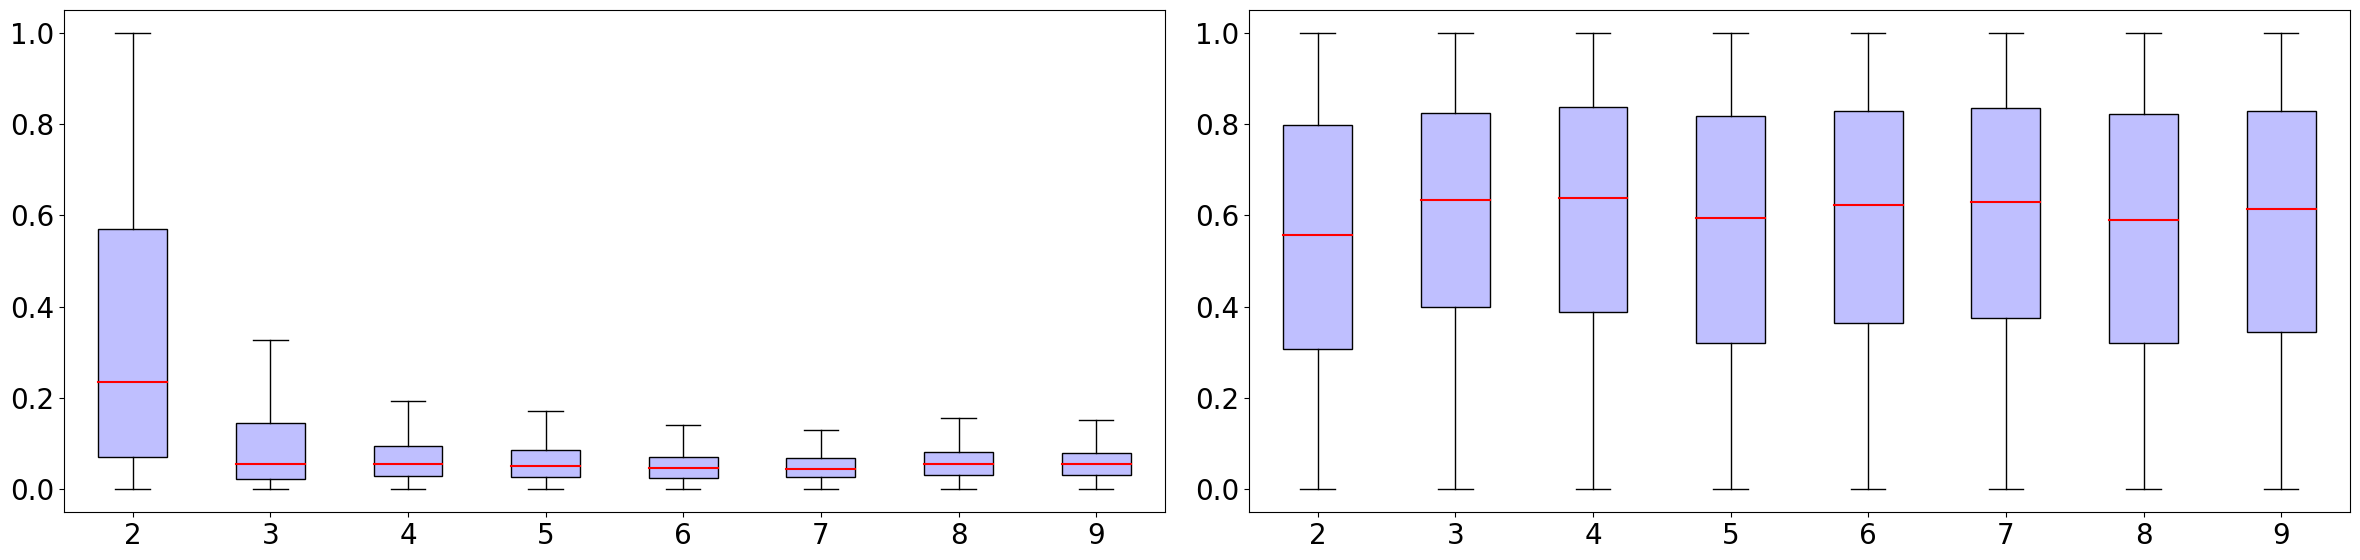

In [12]:
import glob

file_location = './Output/'
model_extension = '_exp_sas'
treat = 'Pac+Carbo-4wk'
cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total

medianprops = dict(color="red",linewidth=1.5)
for c in cells:
    output_name = f'{model_extension}*{c}*_{treat}'
    files = sorted(glob.glob(f'{file_location}chain{output_name}*'))
    all_chains = {}
    split_size = 0
    for i,current_file in enumerate(files):
        if i == 0:
            split_size = len(current_file.split('-'))
        if len(current_file.split('-')) == split_size:
            points = int(current_file.split('-')[1].split('_')[0])
        else:
            points = 9
        with open(current_file, 'rb') as f:
            all_chains[points] = pickle.load(f)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
    axes = axes.ravel()
    ax = axes[0]
    par_data = []
    axis_labels = []
    for key in all_chains:
        axis_labels.append(key)
        par_data.append(all_chains[key]['a_treat'])
    box = ax.boxplot(par_data, showfliers=False, patch_artist=True,medianprops=medianprops)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    for patch in box['boxes']:
        patch.set_facecolor((0.75,0.75,1))
    ax.set_xticks(ax.get_xticks().tolist())
    ax.set_xticklabels(axis_labels,rotation=0)
    ax = axes[1]
    par_data = []
    axis_labels = []
    for key in all_chains:
        axis_labels.append(key)
        par_data.append(all_chains[key]['b_treat'])
    box = ax.boxplot(par_data, showfliers=False, patch_artist=True,medianprops=medianprops)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    for patch in box['boxes']:
        patch.set_facecolor((0.75,0.75,1))
    ax.set_xticks(ax.get_xticks().tolist())
    ax.set_xticklabels(axis_labels,rotation=0)
    plt.tight_layout()
    plt.show()
    break

In [13]:
import glob

file_location = './PaperFigures/'
model_extension = '_exp_sas'
treat = 'Pac+Carbo-4wk'
cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total
days = {2:4,
        3:7,
        4:11,
        5:14,
        6:18,
        7:21,
        8:25,
        9:28}
medianprops = dict(color="red",linewidth=1.5)
for j,c in enumerate(cells):
    for n,model_extension in enumerate(['_exp_treat','_exp_sas']):
        output_name = f'{model_extension}*{c}*_{treat}'
        files = sorted(glob.glob(f'{file_location}chain{output_name}*'))
        all_chains = {}
        split_size = 0
        for i,current_file in enumerate(files):
            if i == 0:
                split_size = len(current_file.split('-'))
            if len(current_file.split('-')) == split_size:
                points = int(current_file.split('-')[1].split('_')[0])
            else:
                points = 9
            with open(current_file, 'rb') as f:
                all_chains[points] = pickle.load(f)
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
        axes = axes.ravel()
    
        for p,l in enumerate(['a_treat','b_treat']):
    
            ax = axes[p]
            times = []
            median_vals = []
            q25 = []
            q75 = []
            ci2_5 = []
            ci97_5 = []
            
            for key in sorted(all_chains):
                samples = np.array(all_chains[key][l])
                times.append(days[key])
                median_vals.append(np.percentile(samples, 50))
                q25.append(np.percentile(samples, 25))
                q75.append(np.percentile(samples, 75))
                ci2_5.append(np.percentile(samples, 2.5))
                ci97_5.append(np.percentile(samples, 97.5))
            
            times = np.array(times)
            median_vals = np.array(median_vals)
            q25 = np.array(q25)
            q75 = np.array(q75)
            ci2_5 = np.array(ci2_5)
            ci97_5 = np.array(ci97_5)
            
            # 95% CI band
            ax.fill_between(times, ci2_5, ci97_5, alpha=0.25, color='blue', label='95% CI')
            
            # IQR band
            ax.fill_between(times, q25, q75, alpha=0.5, color='red', label='IQR')
            
            # Median line
            ax.plot(times, median_vals, color='black', linewidth=2, label='Median')
            
            ax.set_xlabel("Days used for calibration")
            ax.set_ylabel(f"${l.replace('_', r'_{')}" + "}$" + " ($\mathrm{days}^{-1}$)")
            ax.set_ylim((0,1))
            ax.set_xlim((4,28))
            ax.set_xticks(times)
            if p == 0:
                ax.legend(frameon=False)
    
        plt.tight_layout()
        #print(f'./PaperFigures/figureS{n+1}-{labels[j]}.pdf')
        plt.savefig(f'./PaperFigures/figureS{n+1}-{labels[j]}.pdf', bbox_inches='tight', pad_inches=0.02)
        plt.close()

./PaperFigures/figureS2-PDX 1.pdf


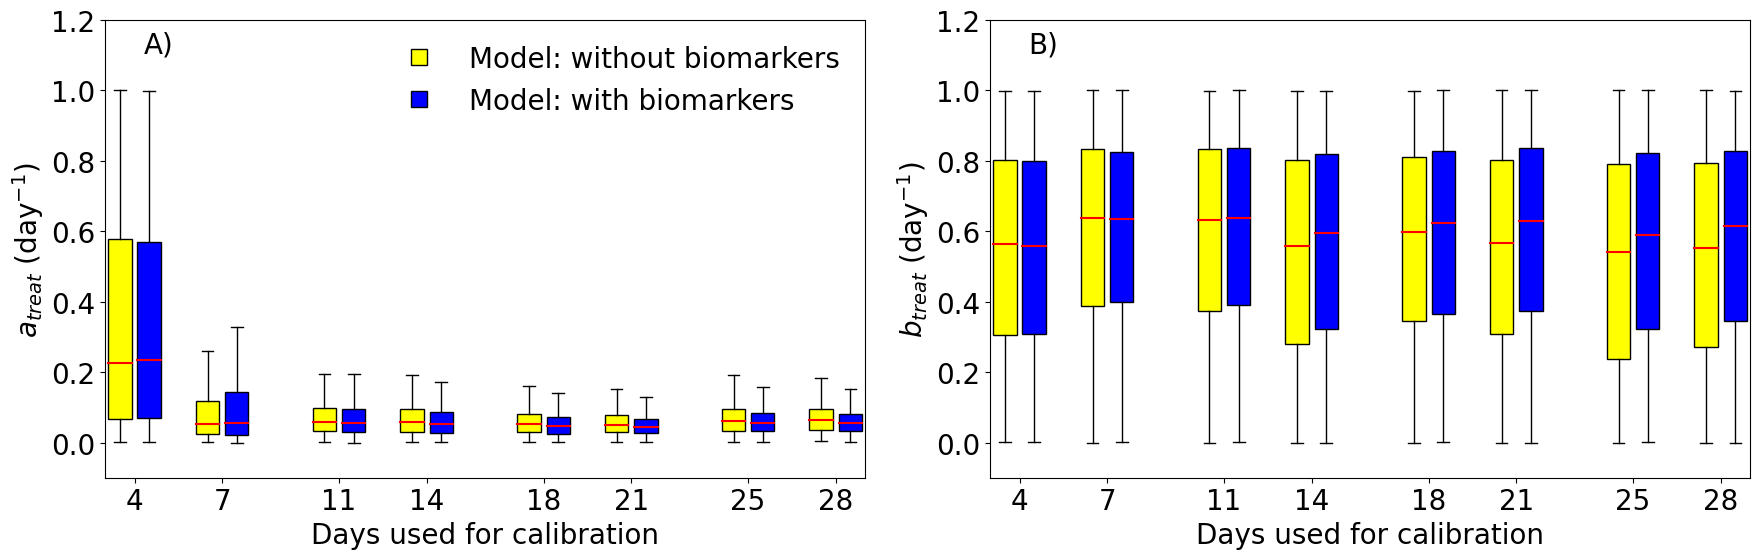

./PaperFigures/figureS2-PDX 2.pdf


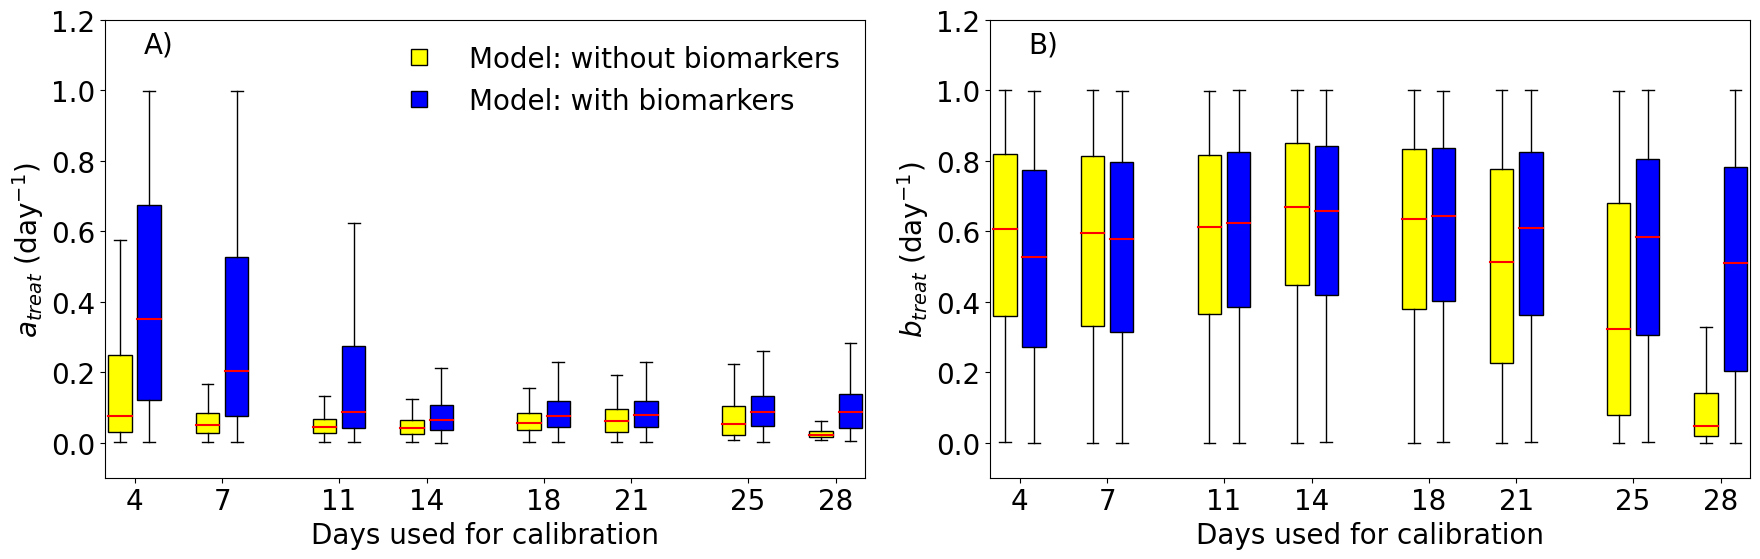

./PaperFigures/figureS2-PDX 3.pdf


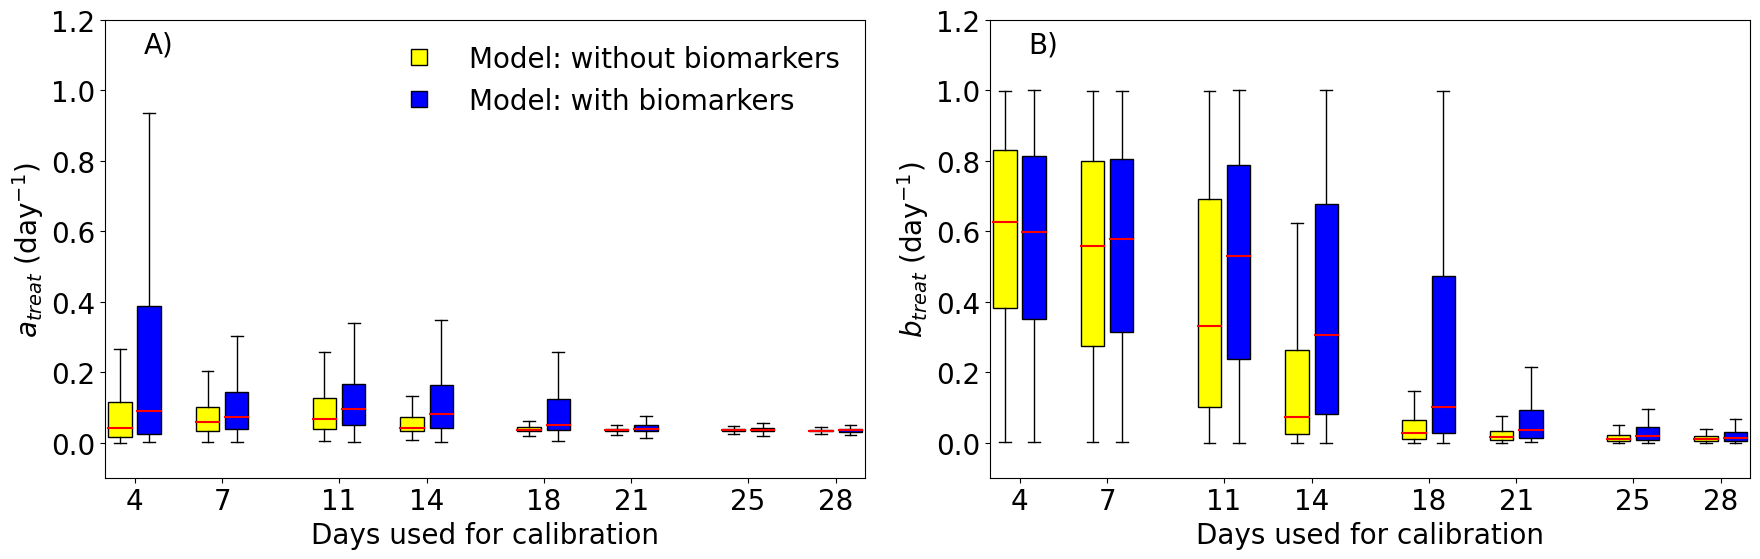

./PaperFigures/figureS2-PDX 4.pdf


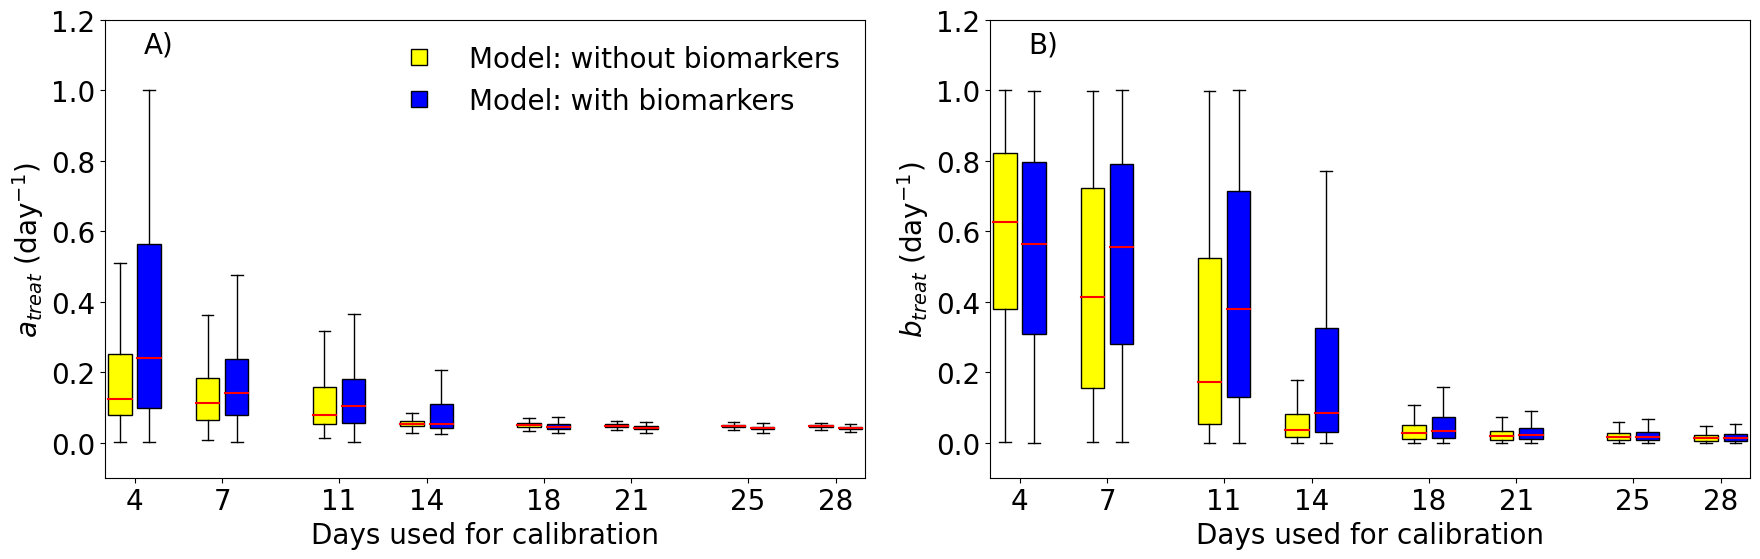

./PaperFigures/figureS2-PDX 5.pdf


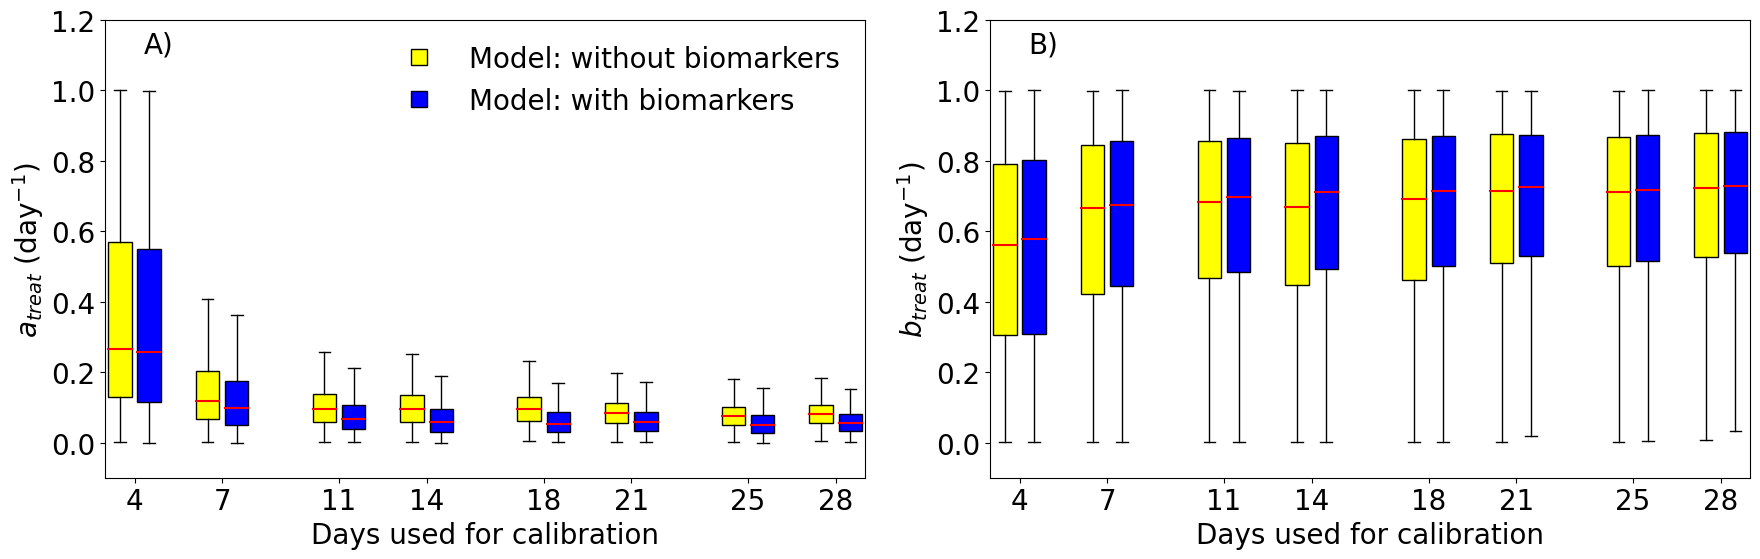

./PaperFigures/figureS2-PDX 6.pdf


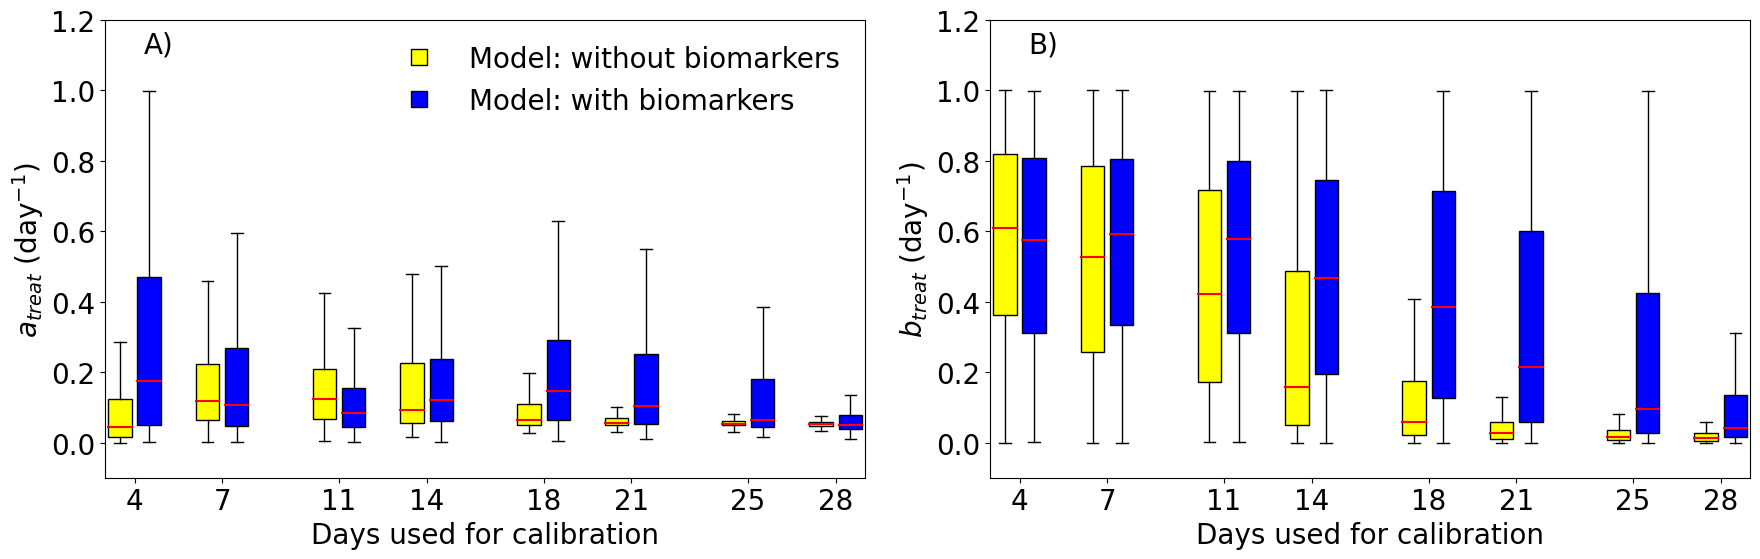

./PaperFigures/figureS2-PDX 7.pdf


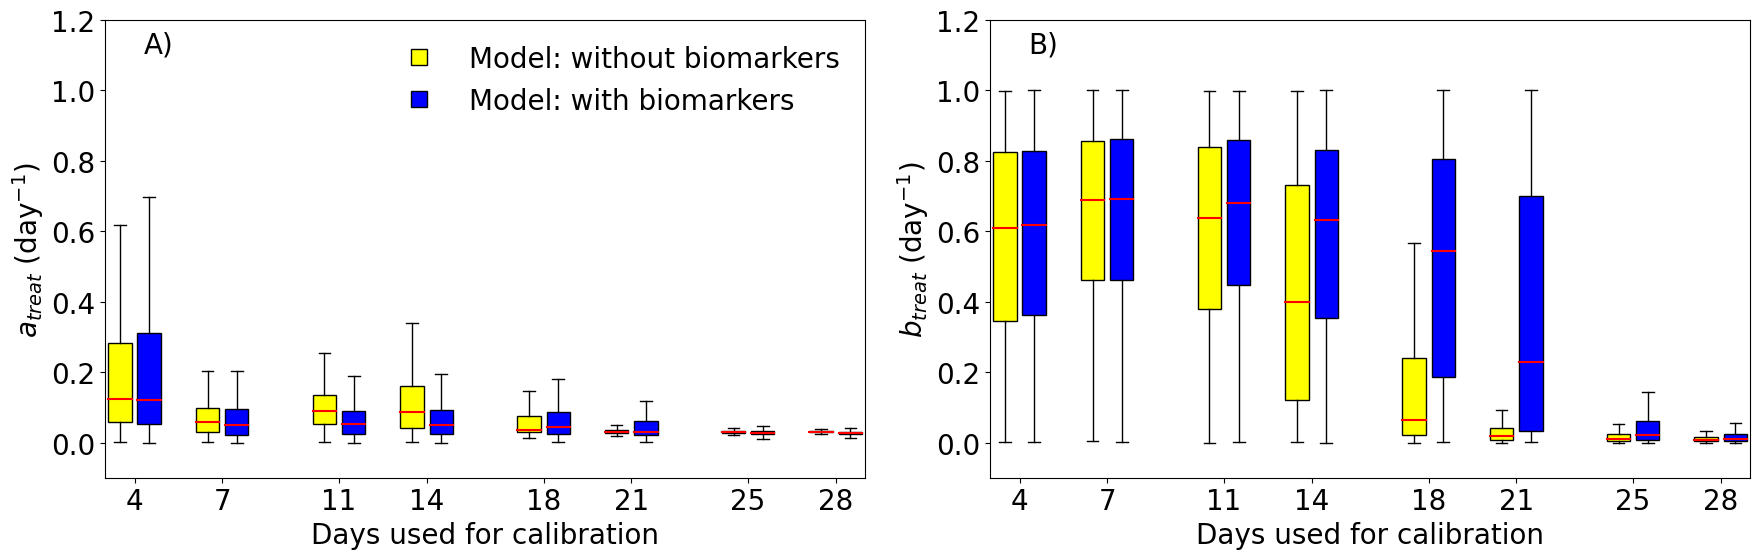

In [14]:
import glob
from matplotlib.lines import Line2D
# Create proxy artists for legend
legend_elements = [
    Line2D([0], [0], color='black', lw=0, marker='s', markersize=12, markerfacecolor=(1, 1, 0), label='Model: without biomarkers'),
    Line2D([0], [0], color='black', lw=0, marker='s', markersize=12, markerfacecolor=(0, 0, 1), label='Model: with biomarkers')
]

medianprops = dict(color=(1, 0, 0),linewidth=1.5)
file_location = './PaperFigures/'
treat = 'Pac+Carbo-4wk'
cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total
days = {2:4,
        3:7,
        4:11,
        5:14,
        6:18,
        7:21,
        8:25,
        9:28}

for j,c in enumerate(cells):
    all_treat = {}
    for n,model_extension in enumerate(['_exp_treat','_exp_sas']):
        output_name = f'{model_extension}*{c}*_{treat}'
        files = sorted(glob.glob(f'{file_location}chain{output_name}*'))
        all_chains = {}
        split_size = 0
        for i,current_file in enumerate(files):
            if i == 0:
                split_size = len(current_file.split('-'))
            if len(current_file.split('-')) == split_size:
                points = int(current_file.split('-')[1].split('_')[0])
            else:
                points = 9
            with open(current_file, 'rb') as f:
                all_chains[points] = pickle.load(f)
        all_treat[model_extension] = all_chains
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    axes = axes.ravel()
    for p,l in enumerate(['a_treat','b_treat']):
        ax = axes[p]
        width = 1  # controls how far apart the groups are
    
        for t, ct in enumerate(all_treat):
            all_chains = all_treat[ct]
            par_data = []
            axis_labels = []
            positions = []
            for key in sorted(all_chains):  # sort for consistent order
                x = days[key]
                axis_labels.append(x)
                par_data.append(all_chains[key][l])
                positions.append(x + (t - 0.5) * width)  # offset: -0.5*width for t=0, +0.5*width for t=1
    
            box = ax.boxplot(par_data, positions=positions, widths=width * 0.8,
                             showfliers=False, patch_artist=True, medianprops=medianprops)
            if t == 0:
                for patch in box['boxes']:
                    patch.set_facecolor((1, 1, 0))
            else:
                for patch in box['boxes']:
                    patch.set_facecolor((0, 0, 1))
    
        ax.set_xticks(sorted(days.values()))
        ax.set_xticklabels(sorted(days.values()))
        ax.set_xlabel("Days used for calibration")
        ax.set_ylabel(f"${l.replace('_', r'_{')}" + "}$" + " ($\mathrm{day}^{-1}$)")
        ax.set_ylim((-0.1,1.2))
        #ax.set_xlim((4,28))
        #ax.set_xticks(times)
        ax.text(0.05,.93,f'{string.ascii_uppercase[p]})' ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)
    axes[0].legend(handles=legend_elements, loc='upper right', frameon=False)
    plt.tight_layout()
    print(f'./PaperFigures/figureS2-{labels[j]}.pdf')
    plt.savefig(f'./PaperFigures/figureS2-{labels[j]}.pdf', bbox_inches='tight', pad_inches=0.02)
    plt.show()
    # break

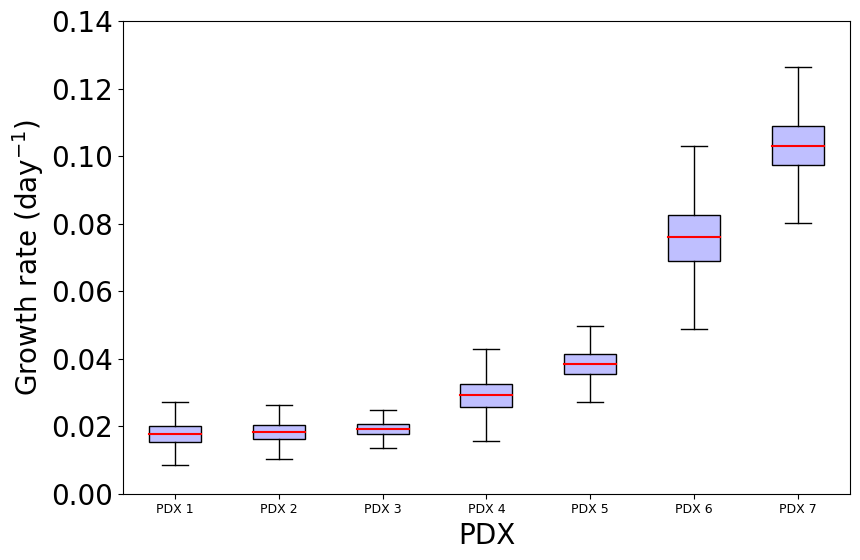

In [15]:
import glob
medianprops = dict(color=(1, 0, 0),linewidth=1.5)
file_location = './PaperFigures/'
cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total
all_chains = {}
axis_labels = []
for j,c in enumerate(cells):
    output_name = f'*{c}*ted'
    files = sorted(glob.glob(f'{file_location}chain{output_name}*'))
    if len(files) > 1:
        print('ERROR')
    else:
        with open(files[0], 'rb') as f:
            all_chains[labels[j]] = pickle.load(f)
        axis_labels.append(labels[j])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
l = 'r'
par_data = []
for key in all_chains:  # sort for consistent order
    par_data.append(all_chains[key][l])
box = ax.boxplot(par_data, showfliers=False, patch_artist=True,medianprops=medianprops)
for patch in box['boxes']:
    patch.set_facecolor((0.75,0.75,1))
ax.set_xticks(ax.get_xticks().tolist())
ax.set_xticklabels(axis_labels,rotation=0, fontsize=9)
ax.set_ylabel("Growth rate ($\mathrm{day}^{-1}$)")
ax.set_xlabel(f"PDX")
ax.set_ylim((0,0.14))
plt.tight_layout()
plt.savefig(f'./PaperFigures/figureS1.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

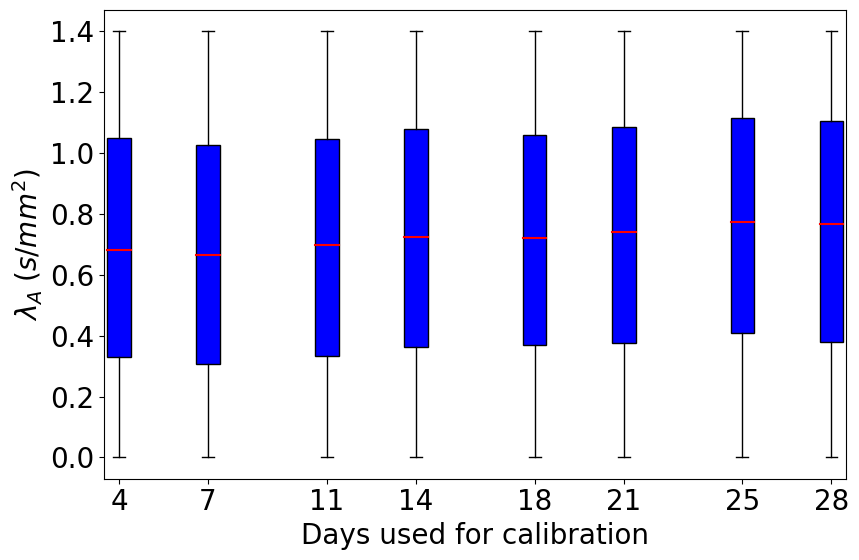

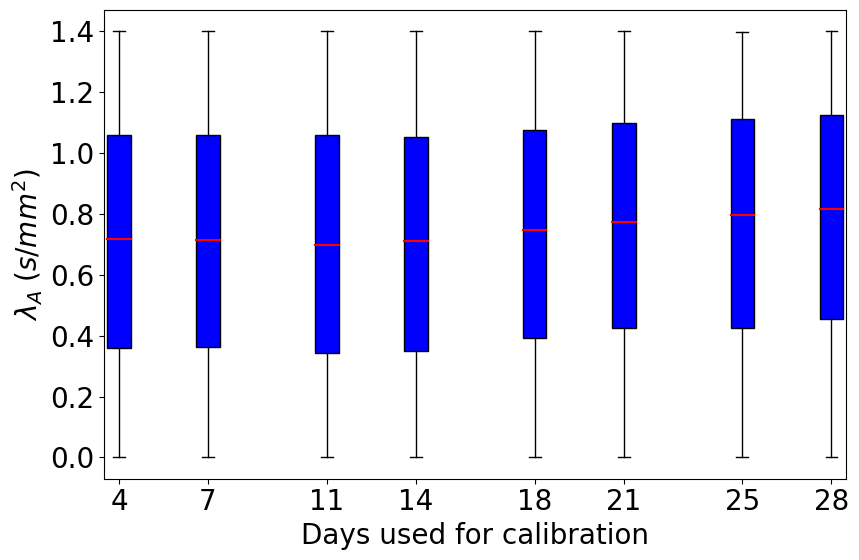

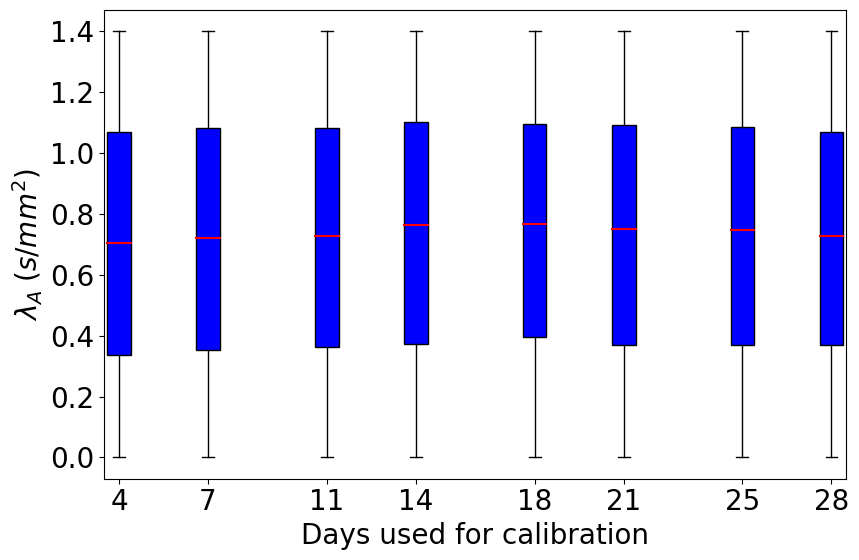

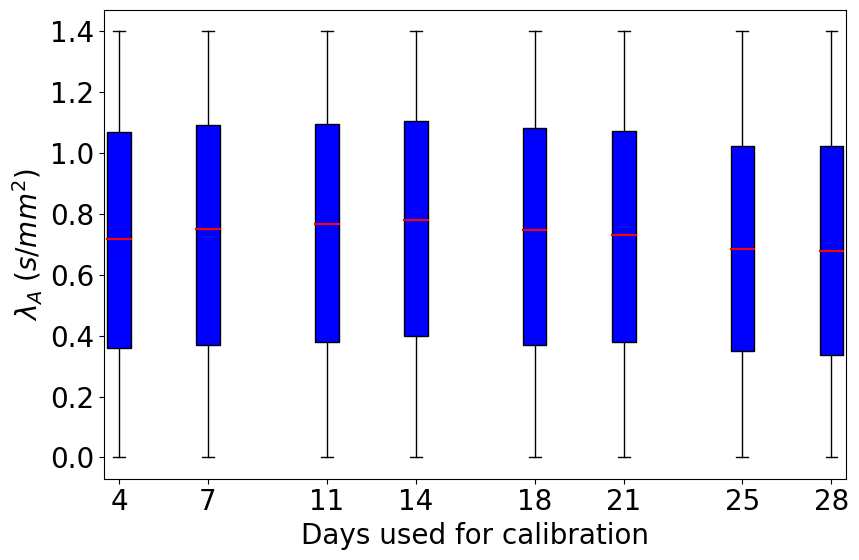

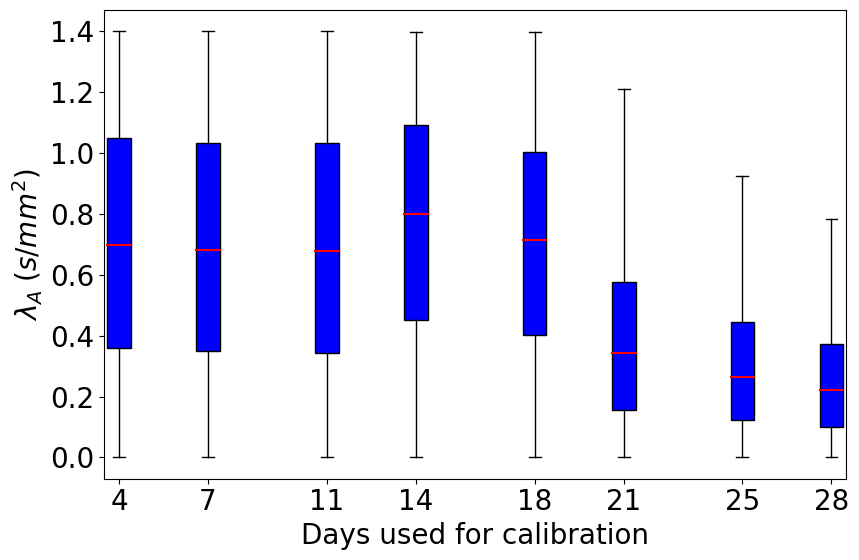

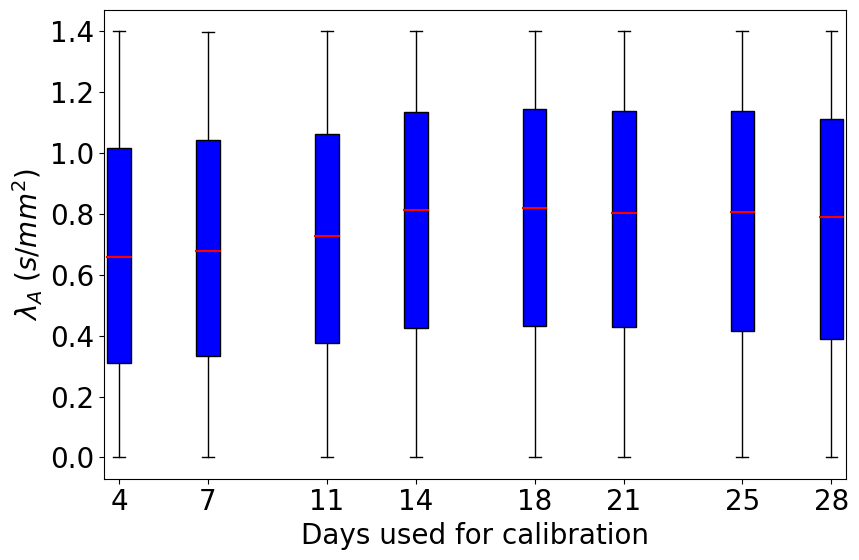

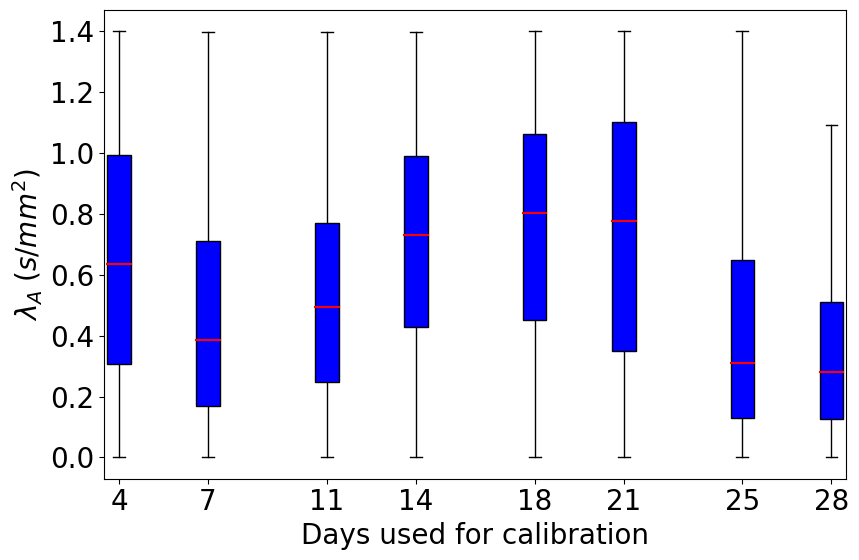

In [16]:
import glob
from matplotlib.lines import Line2D
# Create proxy artists for legend
legend_elements = [
    Line2D([0], [0], color='black', lw=0, marker='s', markersize=12, markerfacecolor=(1, 1, 0), label='Model: without biomarkers'),
    Line2D([0], [0], color='black', lw=0, marker='s', markersize=12, markerfacecolor=(0, 0, 1), label='Model: with biomarkers')
]

medianprops = dict(color=(1, 0, 0),linewidth=1.5)
file_location = './PaperFigures/'
treat = 'Pac+Carbo-4wk'
cells = ['BCM-3204','R2TG8','15120','103','2277','4175','4849']
labels = ['PDX 1','PDX 2','PDX 3','PDX 4','PDX 5','PDX 6','PDX 7']  # 7 plots total
days = {2:4,
        3:7,
        4:11,
        5:14,
        6:18,
        7:21,
        8:25,
        9:28}
param_map = {
    'pADC_tt': r'\lambda_A\;(s/mm^2)',
    'pKtr_tt': r'\lambda_K\;(min)'
}
for j,c in enumerate(cells):
    all_treat = {}
    for n,model_extension in enumerate(['_exp_sas']):
        output_name = f'{model_extension}*{c}*_{treat}'
        files = sorted(glob.glob(f'{file_location}chain{output_name}*'))
        all_chains = {}
        split_size = 0
        for i,current_file in enumerate(files):
            if i == 0:
                split_size = len(current_file.split('-'))
            if len(current_file.split('-')) == split_size:
                points = int(current_file.split('-')[1].split('_')[0])
            else:
                points = 9
            with open(current_file, 'rb') as f:
                all_chains[points] = pickle.load(f)
        all_treat[model_extension] = all_chains
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    #axes = axes.ravel()
    for p,l in enumerate(['pADC_tt']):
    #for p,l in enumerate(['pADC_tt', 'pKtr_tt']):
        #ax = axes[p]
        width = 1  # controls how far apart the groups are
    
        for t, ct in enumerate(all_treat):
            all_chains = all_treat[ct]
            par_data = []
            axis_labels = []
            positions = []
            for key in sorted(all_chains):  # sort for consistent order
                x = days[key]
                axis_labels.append(x)
                par_data.append(all_chains[key][l])
                positions.append(x)  # offset: -0.5*width for t=0, +0.5*width for t=1
    
            box = ax.boxplot(par_data, positions=positions, widths=width * 0.8,
                             showfliers=False, patch_artist=True, medianprops=medianprops)
            for patch in box['boxes']:
                patch.set_facecolor((0, 0, 1))
    
        ax.set_xticks(sorted(days.values()))
        ax.set_xticklabels(sorted(days.values()))
        ax.set_xlabel("Days used for calibration")
        ax.set_ylabel(f"${param_map[l]}$")
        #ax.set_ylim((-0.1,1.2))
        #ax.set_xlim((4,28))
        #ax.set_xticks(times)
        #ax.text(0.05,.93,f'{string.ascii_uppercase[p]})' ,horizontalalignment='left',transform=ax.transAxes,fontsize = 20)
    # axes[0].legend(handles=legend_elements, loc='upper right', frameon=False)
    plt.tight_layout()
    plt.savefig(f'./PaperFigures/figureS3-{labels[j]}.pdf', bbox_inches='tight', pad_inches=0.02)
    plt.show()
    # break